<h1> Business Problem

<h4> Can we group our customers in order to save money by using targeted advertising?

Performance Measure: Silhouette Coefficient

In [1]:
import pandas as pd

In [2]:
#uploading the data set, it came with data in only ome column with delimter / to seperate values.
df = pd.read_csv("marketing_campaign.csv", sep='\t')

In [3]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

<H2> Understanding the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

In [5]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
# understanding the size of the  data set
df.shape

(2240, 29)

In [7]:
#checking na values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df.describe(include='all') 

ID   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
std      3246.662198    11.984069         NaN            NaN   25173.076661   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

            Kidhome     Teenhome Dt_Customer      Recency     MntWines  ...  \
count   2240.000000  2240.000000        2240  2240.000000  2240.000000  ...   
unique          NaN          NaN         663          NaN          NaN  ...   
top             NaN          NaN  31-08-2012          NaN          NaN  ...   
freq            NaN          NaN          12          NaN          NaN  ...   
mean       0.444196     0.506250         NaN    49.109375   303.935714  ...   
std        0.538398     0.544538         NaN    28.962453   336.597393  ...   
min        0.000000     0.000000         NaN     0.000000     0.000000  ...   
25%        0.000000     0.000000         NaN    24.000000    23.750000  ...   
50%        0.000000     0.000000         NaN    49.000000   173.500000  ...   
75%        1.000000     1.000000         NaN    74.000000   504.250000  ...   
max        2.000000     2.000000         NaN    99.000000  1493.000000  ...   

        NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count         2240.000000   2240.000000   2240.000000   2240.000000   
unique                NaN           NaN           NaN           NaN   
top                   NaN           NaN           NaN           NaN   
freq                  NaN           NaN           NaN           NaN   
mean             5.316518      0.072768      0.074554      0.072768   
std              2.426645      0.259813      0.262728      0.259813   
min              0.000000      0.000000      0.000000      0.000000   
25%              3.000000      0.000000      0.000000      0.000000   
50%              6.000000      0.000000      0.000000      0.000000   
75%              7.000000      0.000000      0.000000      0.000000   
max             20.000000      1.000000      1.000000      1.000000   

        AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count    2240.000000   2240.000000  2240.000000         2240.0     2240.0   
unique           NaN           NaN          NaN            NaN        NaN   
top              NaN           NaN          NaN            NaN        NaN   
freq             NaN           NaN          NaN            NaN        NaN   
mean        0.064286      0.013393     0.009375            3.0       11.0   
std         0.245316      0.114976     0.096391            0.0        0.0   
min         0.000000      0.000000     0.000000            3.0       11.0   
25%         0.000000      0.000000     0.000000            3.0       11.0   
50%         0.000000      0.000000     0.000000            3.0       11.0   
75%         0.000000      0.000000     0.000000            3.0       11.0   
max         1.000000      1.000000     1.000000            3.0       11.0   

           Response  
count   2240.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.149107  
std        0.356274  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[11 rows x 29 columns]

In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

<h2> Data Preparation

In [10]:
#replacing na values in Income with the average of that column since there aren't many rows to the dataset.
mean_income= df['Income'].mean()

In [11]:
mean_income

52247.25135379061

In [12]:
df.fillna(mean_income, inplace = True)

In [13]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [14]:
#dropping columns Z_Revenue and Z_CostContact as they on#ly contain one value
df = df.drop(['Z_CostContact','Z_Revenue'], axis = 1)

In [15]:
df.head(2)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  

[2 rows x 27 columns]

<H2> Exploratory Data Analysis

In [16]:
import numpy as np

In [17]:
colours = np.array(["plum","lightcoral", "mediumaquamarine","palegreen"])

In [18]:
# to plot figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

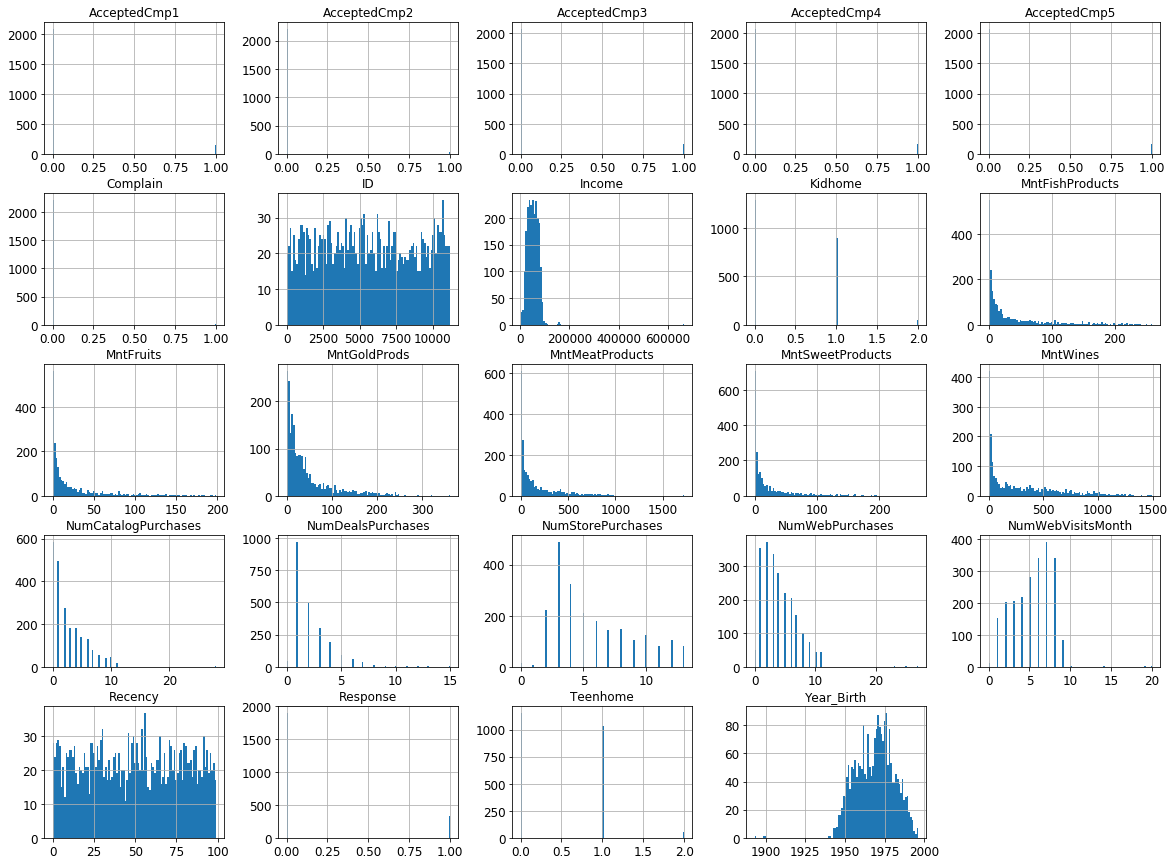

In [19]:
#histograms to understand distributions of numerical values.
df.hist(bins=100,figsize=(20,15))
plt.show()

In [20]:
# year of birth and income appear to be normally distributed

<h3> Outlier Detection

In [21]:

df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

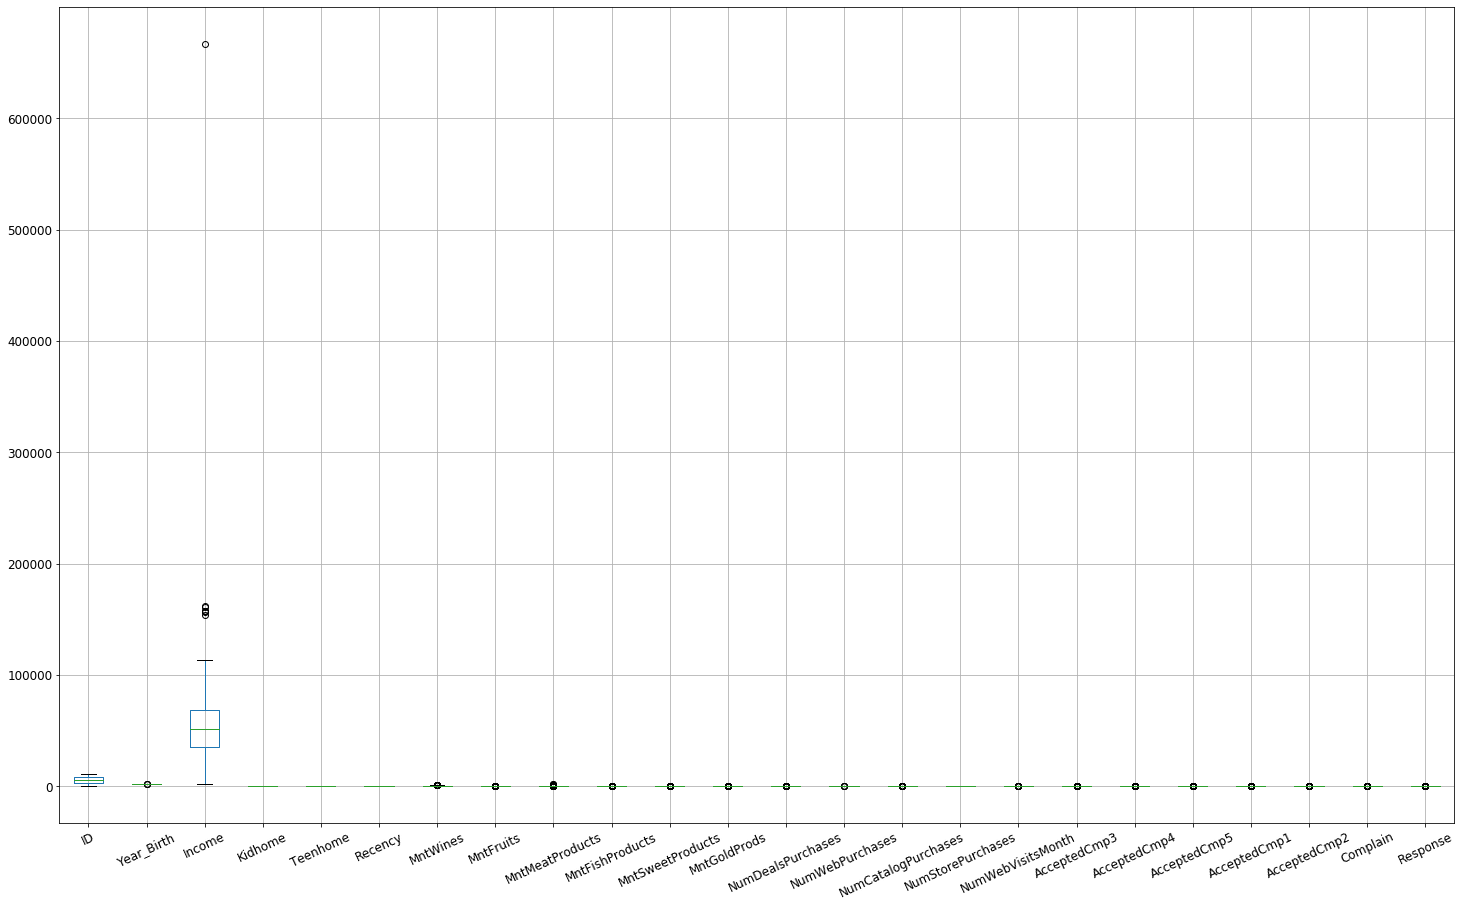

In [22]:
df.boxplot(figsize =(25,18))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=25)
plt.show()

We can see that a lot of the values have outliers, we need to find out how many there are 

In [23]:
# counting how many outliers there are 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [24]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

AcceptedCmp1           144
AcceptedCmp2            30
AcceptedCmp3           163
AcceptedCmp4           167
AcceptedCmp5           163
Complain                21
Dt_Customer              0
Education                0
ID                       0
Income                   8
Kidhome                  0
Marital_Status           0
MntFishProducts        223
MntFruits              227
MntGoldProds           207
MntMeatProducts        175
MntSweetProducts       248
MntWines                35
NumCatalogPurchases     23
NumDealsPurchases       86
NumStorePurchases        0
NumWebPurchases          4
NumWebVisitsMonth        8
Recency                  0
Response               334
Teenhome                 0
Year_Birth               3
dtype: int64

Year, complain and AcceptedCmp2 have few outliers therefore some may be caused by incorrect data. Let's look at those in more detail

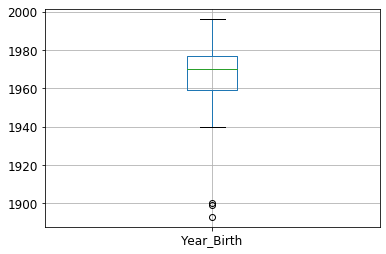

In [25]:
#starting with Year_Birth
df.boxplot(column = 'Year_Birth')

In [26]:
#values seem like errors as people would be 100+ so they are dropped
df.drop(df[df['Year_Birth'] < 1940].index, inplace=True)

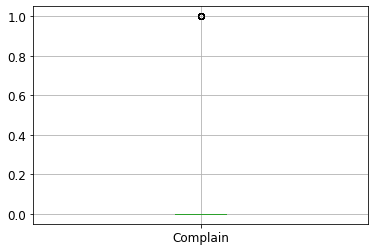

In [27]:
df.boxplot(column = 'Complain')

In [28]:
df['Complain'].value_counts()

0    2217
1      20
Name: Complain, dtype: int64

These are not being dropped as they are not outliers, they are part of the data

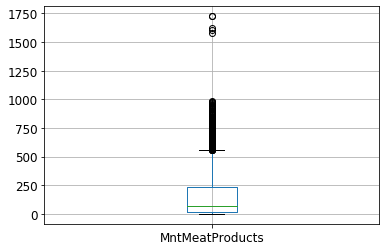

In [29]:
df.boxplot(column = 'MntMeatProducts')

There are extreme outliers in MntMeatProducts, so we will remove anything above 1500. 

In [30]:
#values seem like errors as people would be 100+ so they are dropped
df.drop(df[df['MntMeatProducts'] > 1500].index, inplace=True)

Now we have resolved some of the featurs with outliers, lets take a better look at the rest of them to ensure there are no others we need to exclude

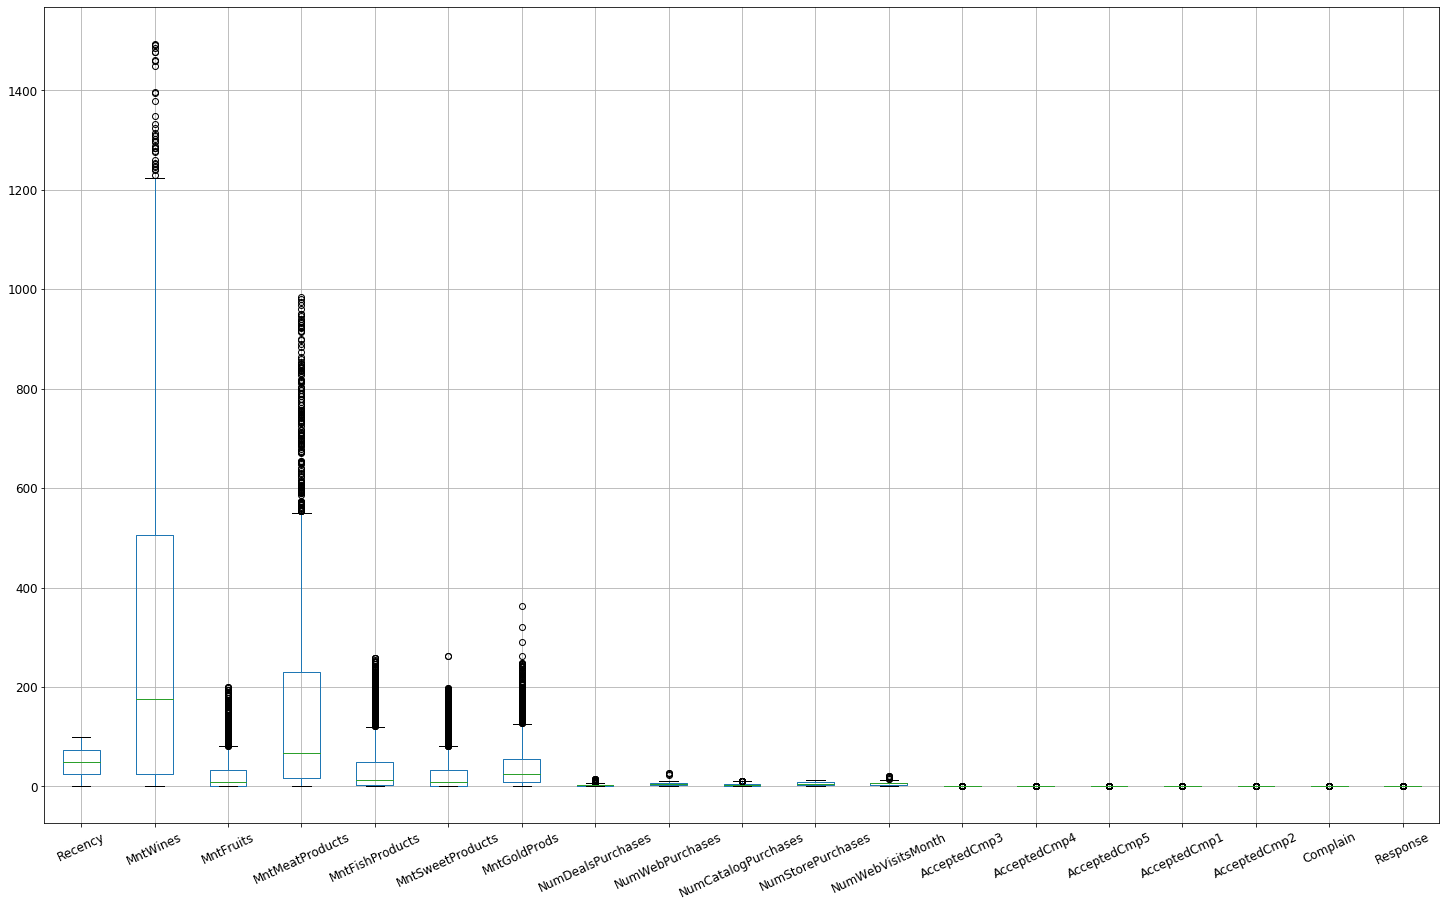

In [31]:
#recreating the boxplot but with fewer variables
df.boxplot(column= ['Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'], figsize =(25,18))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=25)
plt.show()

In [32]:
#dropping outliers from Sweet Products
df.drop(df[df['MntSweetProducts'] > 250].index, inplace=True)

In [33]:
#dropping outliers from Gold Products
df.drop(df[df['MntGoldProds'] > 250].index, inplace=True)

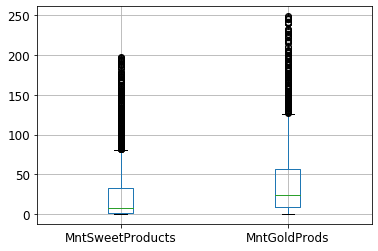

In [34]:
df.boxplot(column = ['MntSweetProducts', 'MntGoldProds'])

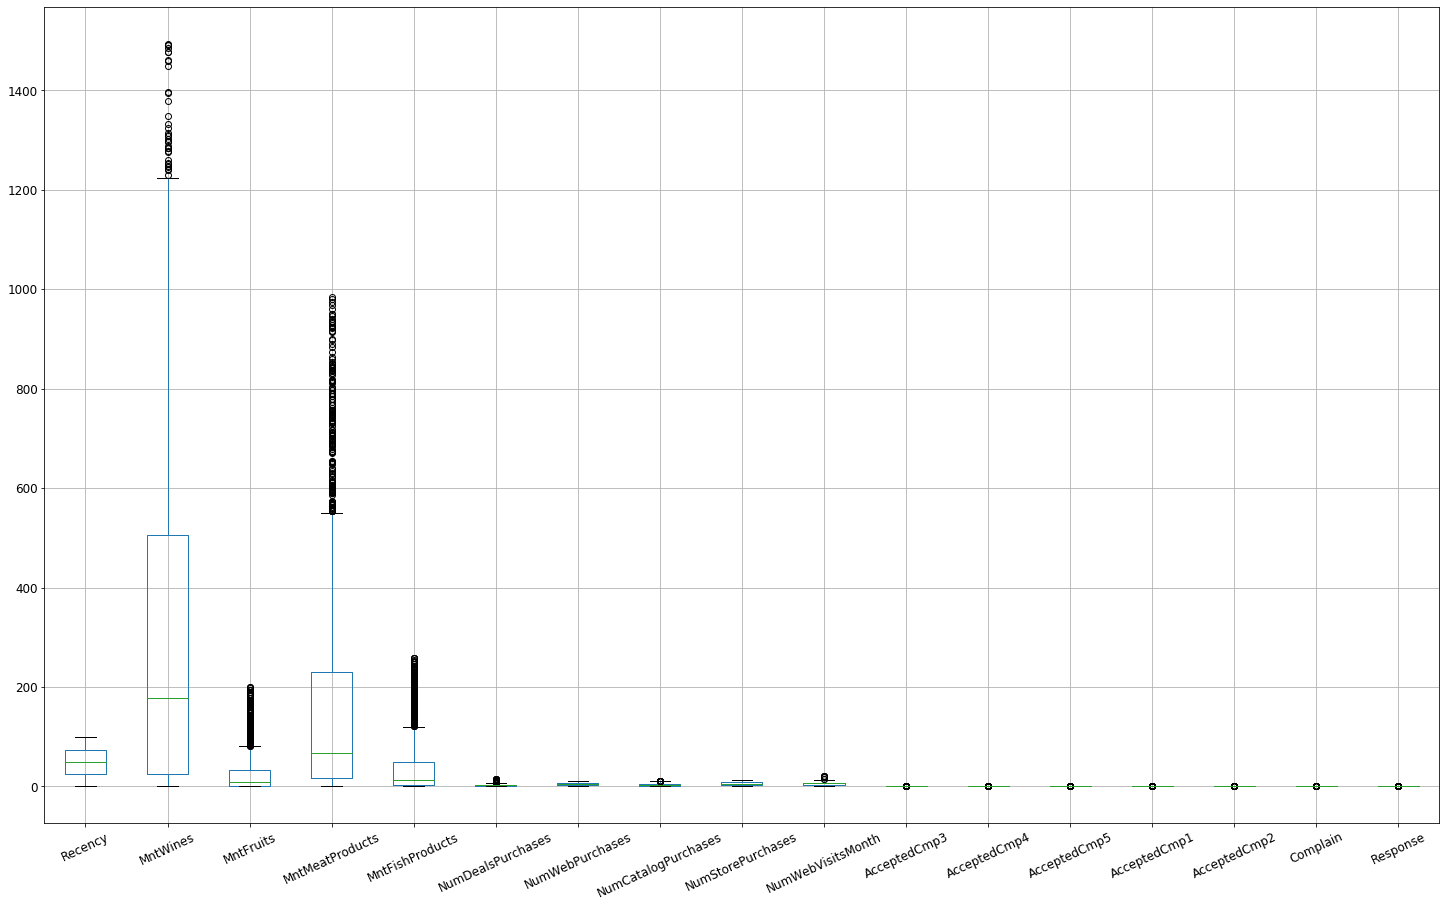

In [35]:
#recreating the boxplot but with fewer variables
df.boxplot(column= ['Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'], figsize =(25,18))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=25)
plt.show()

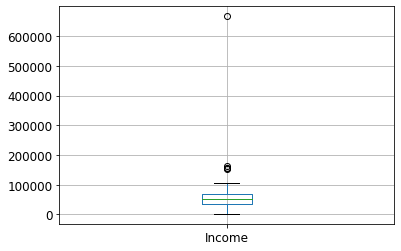

In [36]:
df.boxplot(column = 'Income')

In [37]:
#dropping outliers from Gold Products
df.drop(df[df['MntGoldProds'] > 150000].index, inplace=True)

<h3> correlation plots

In [38]:
import matplotlib as mpl

In [39]:
cmap = mpl.colors.ListedColormap(["plum","lightcoral", "mediumaquamarine","palegreen"])

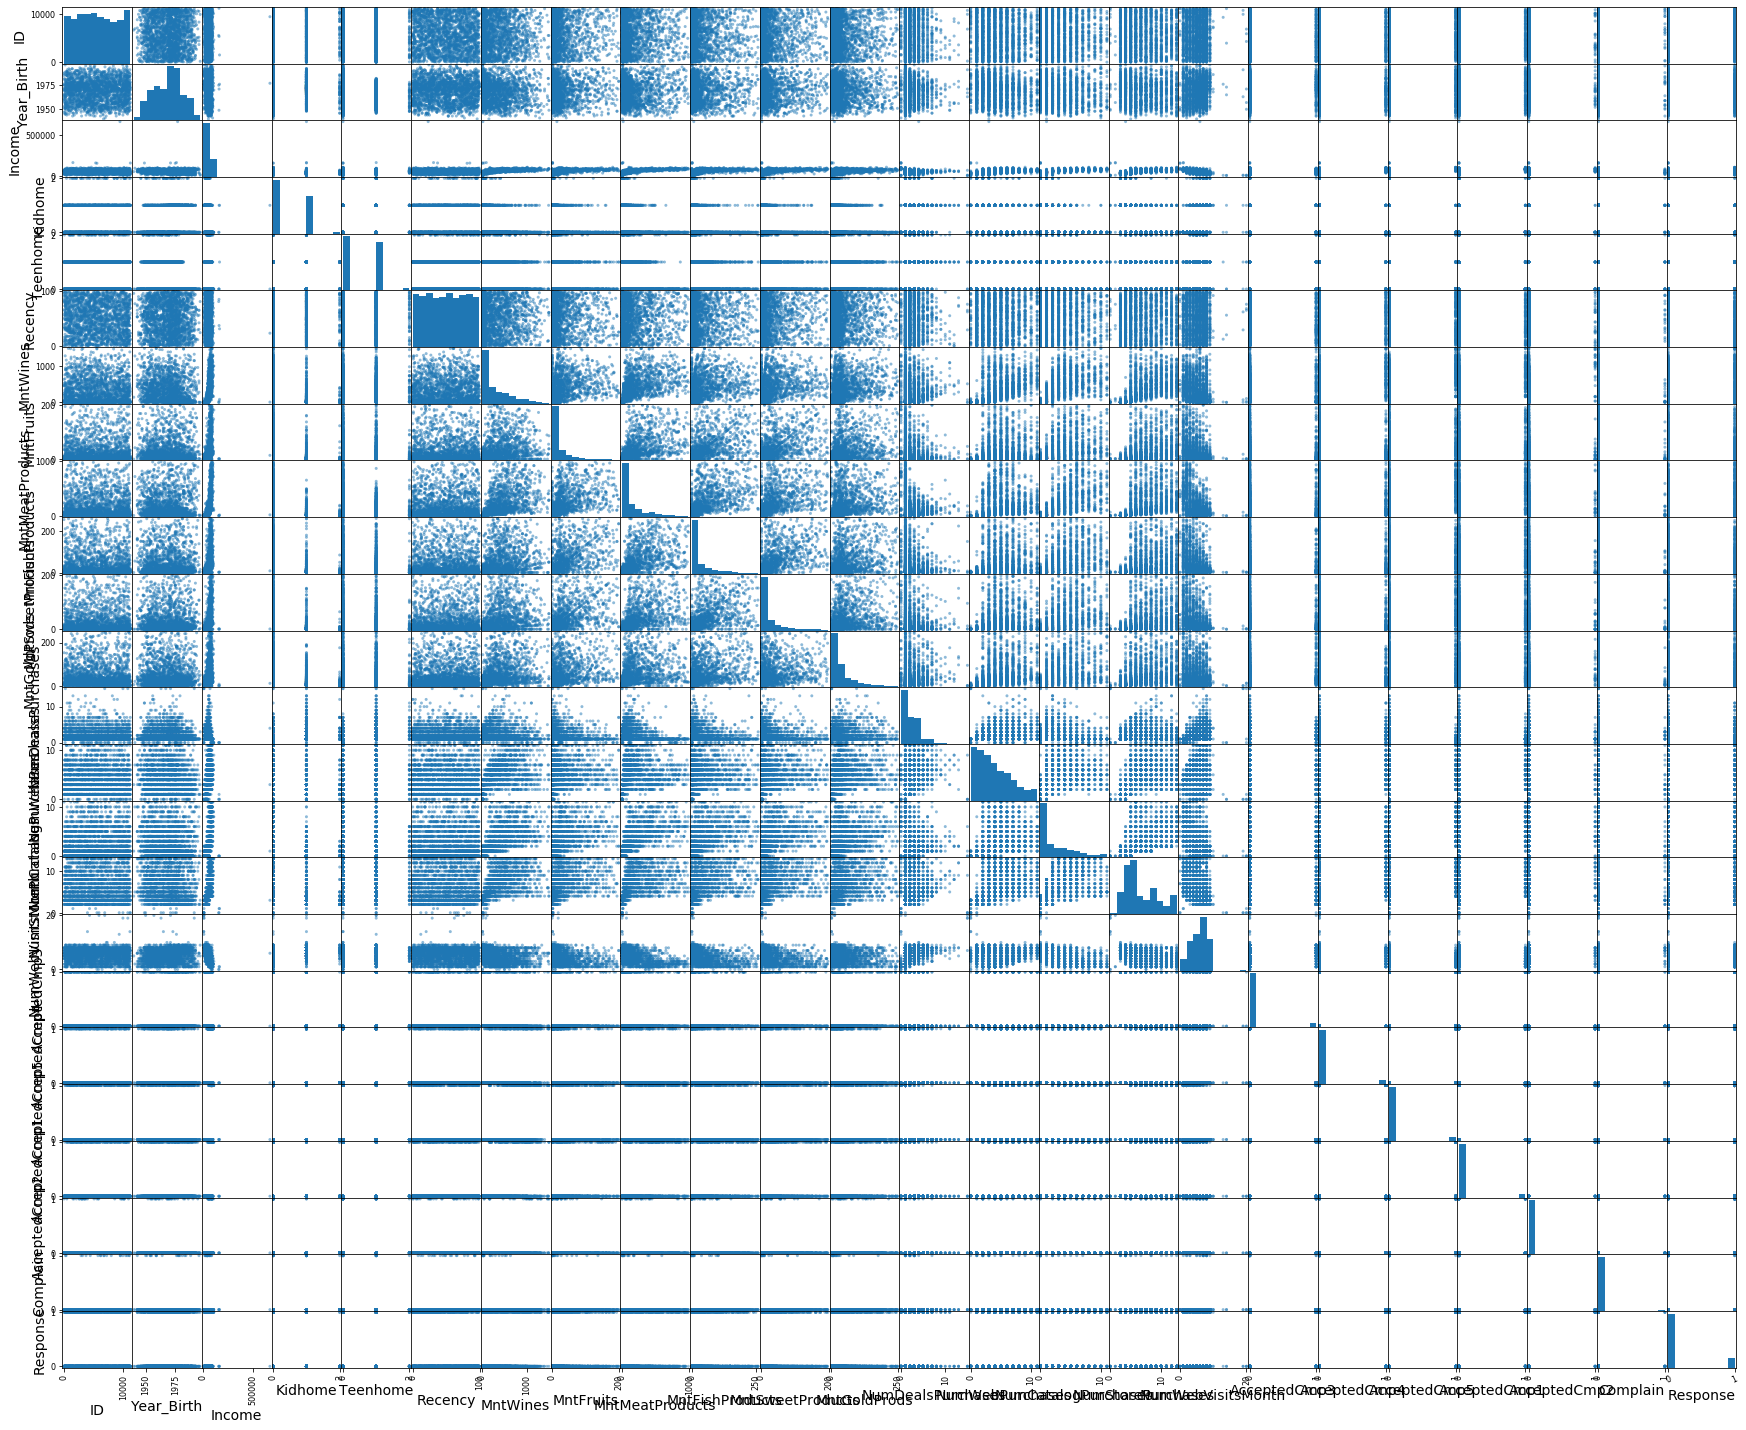

In [40]:
#scatter plot to see if there are any correlations between variables
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(30,30), cmap = cmap)
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=25)
plt.show()

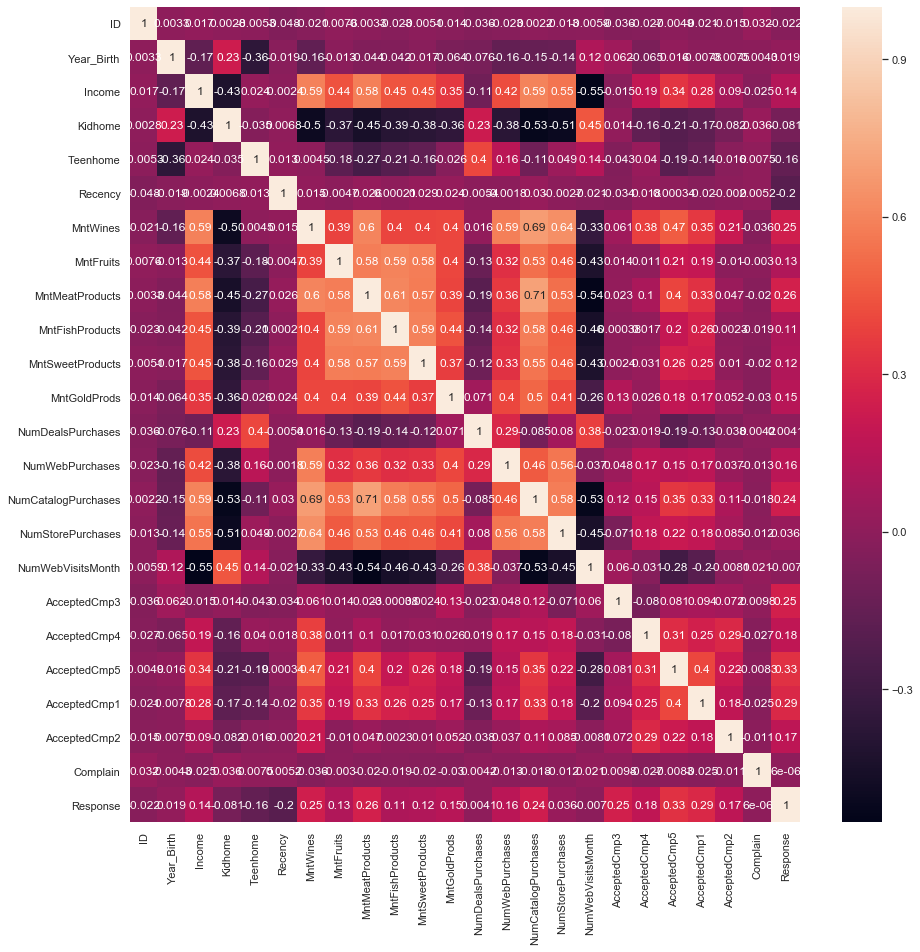

In [41]:
#plotting a correlation matrix to better understand some of the plots
import seaborn as sns
corrMatrix = df.corr()
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(corrMatrix, annot=True,)
plt.show()

There seems to be a correlation between NumCatalogPurchases and MntMeatProducts, let's explore

In [42]:
df['NumCatalogPurchases'].value_counts()

0     580
1     495
2     276
3     184
4     182
5     140
6     127
7      79
8      55
10     48
9      42
11     19
Name: NumCatalogPurchases, dtype: int64

In [43]:
import matplotlib.pyplot as plt

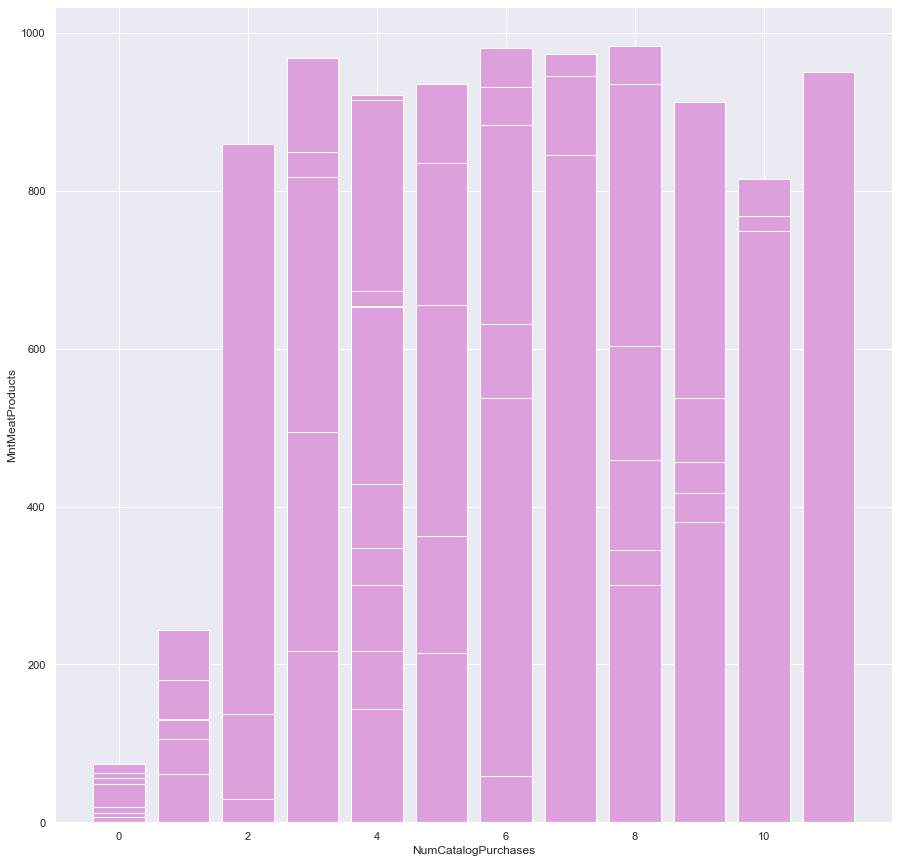

In [44]:
y= df['MntMeatProducts']
x = df['NumCatalogPurchases']
plt.bar(x,y, color = "plum")
plt.xlabel('NumCatalogPurchases')
plt.ylabel('MntMeatProducts')
plt.show()

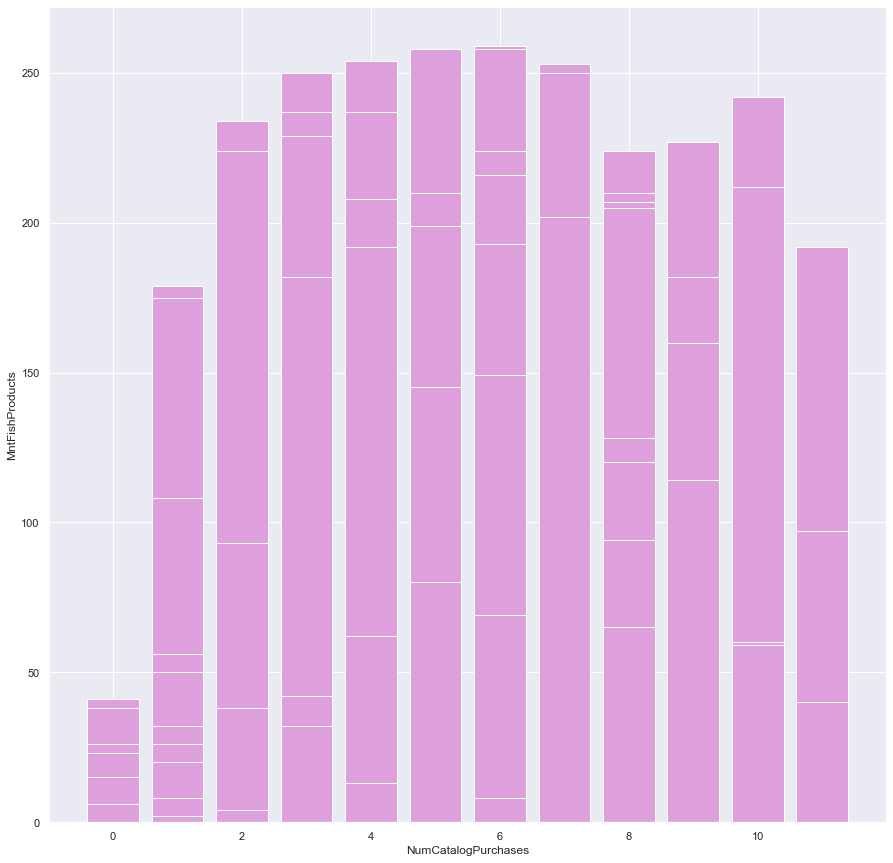

In [45]:
#testing other products to see if there is a similar trend
y= df['MntFishProducts']
x = df['NumCatalogPurchases']
plt.bar(x,y, color = "plum")
plt.xlabel('NumCatalogPurchases')
plt.ylabel('MntFishProducts')
plt.show()

In [46]:
#creating an total spent column to understand its relationship against NumCatalogPurchases
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

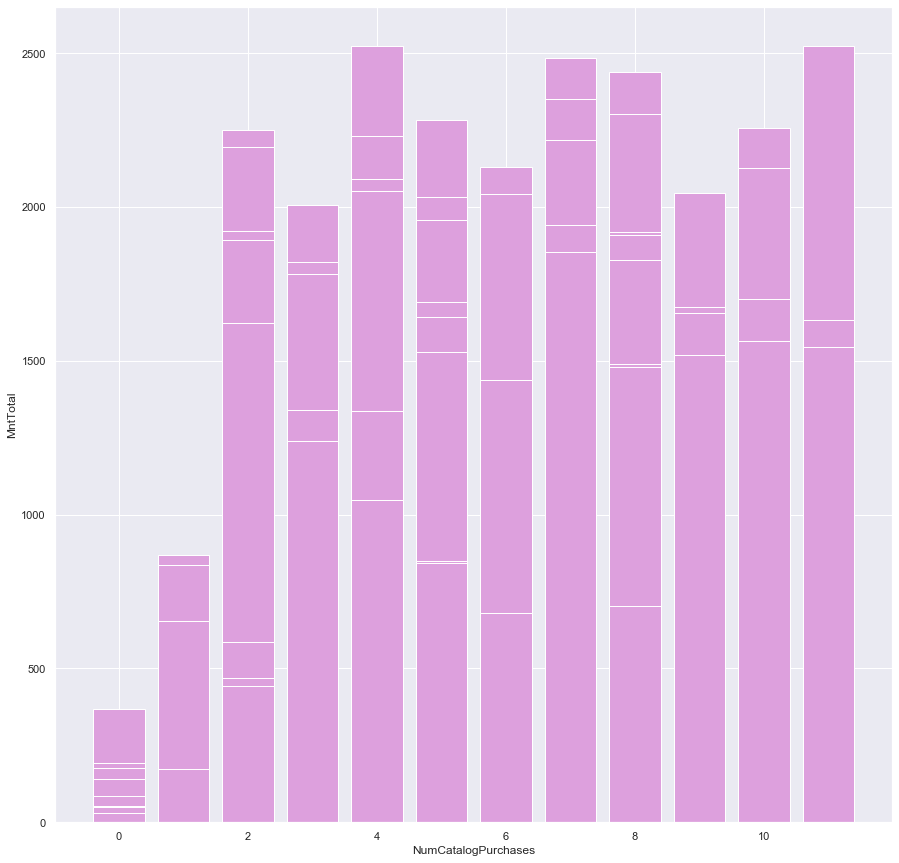

In [47]:
#testing other products to see if there is a similar trend
y= df['MntTotal']
x = df['NumCatalogPurchases']
plt.bar(x,y, color = "plum")
plt.xlabel('NumCatalogPurchases')
plt.ylabel('MntTotal')
plt.show()

In [48]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'MntTotal'],
      dtype='object')

In [49]:
import plotly.express as px

In [50]:
fig = px.histogram(df, x="MntTotal", width=800, height=400, color_discrete_sequence=['plum'],  text_auto=True)
fig.show()

In [51]:
df['MntTotal'].sum()

1344522

We can see from the plot above that most people less than $500

In [52]:
data=df['Income']

In [53]:
def categories(d):
    df_wine2 = pd.DataFrame((d.loc[:,('MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')]).melt())
    fig = px.pie(df_wine2, values='value', names='variable',  width=800, height=400, color_discrete_sequence=px.colors.sequential.RdPu)
    fig.show()

In [54]:
categories(df)

We can see that people mostly spent the most on wine, followed by meat

In [55]:
colours = np.array(["plum"])

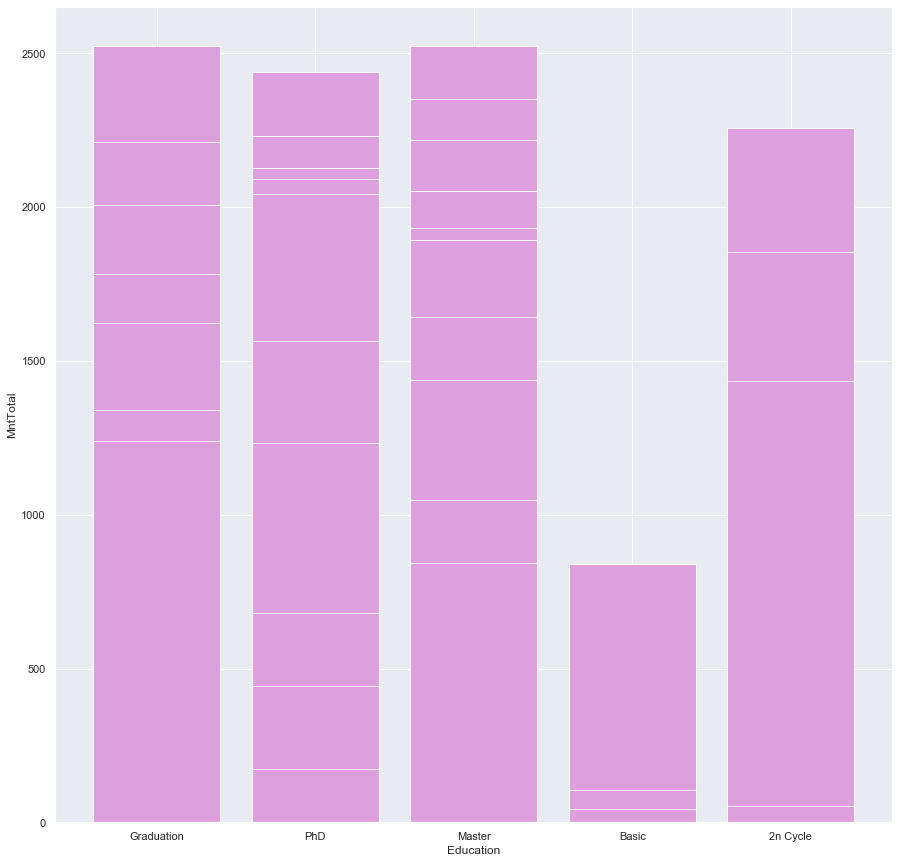

In [56]:
#exploring amount total by education
edu = df['Education']
y = df['MntTotal']
plt.bar(edu,y, color = colours)
xlabel = 'Education'
plt.xlabel('Education')
plt.ylabel('MntTotal')
plt.show()

In [57]:
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [58]:
def channel(d):
    df_ch = pd.DataFrame((d.loc[:,('NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases')]).melt())
    fig = px.pie(df_ch, values='value', names='variable', width=800, height=400, color_discrete_sequence=px.colors.sequential.RdPu)
    fig.show()
channel(df)

In [59]:
pivots = df.groupby('MntTotal')['TotalPurchases'].sum().reset_index()

In [60]:
pivots

MntTotal  TotalPurchases
0            5               0
1            6               0
2            8               6
3            9               3
4           10              15
...        ...             ...
1043      2352              23
1044      2440              24
1045      2486              25
1046      2524              28
1047      2525              34

[1048 rows x 2 columns]

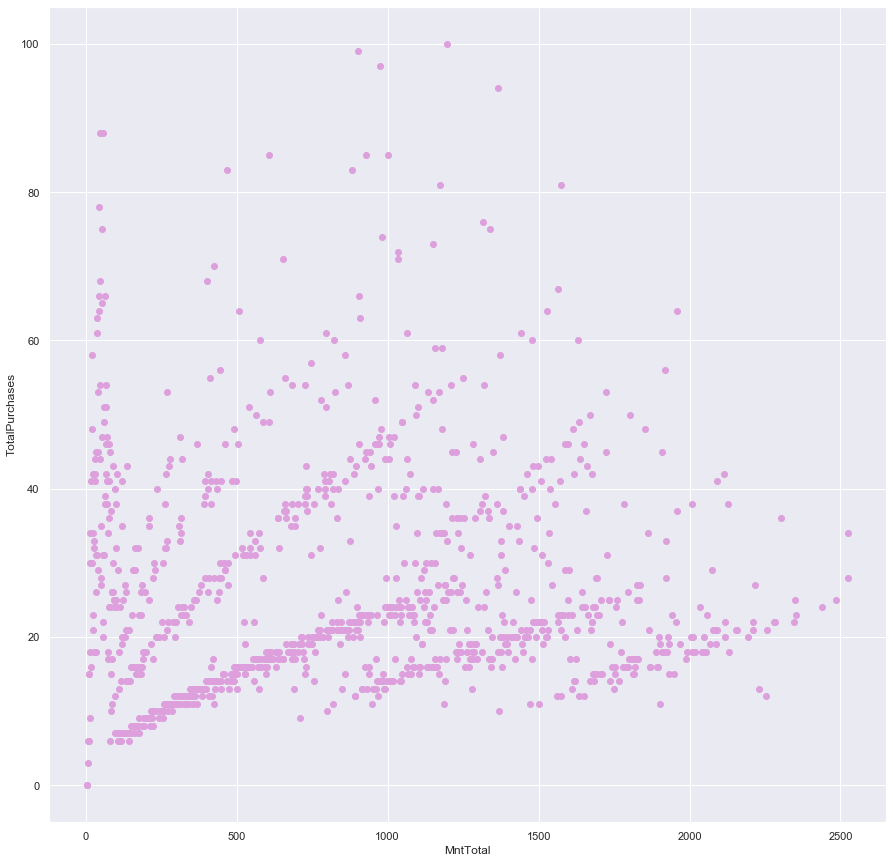

In [61]:
x = pivots['MntTotal']
y = pivots['TotalPurchases']
plt.scatter(x,y, c= colours)
plt.xlabel('MntTotal')
plt.ylabel('TotalPurchases')
plt.show()

In [62]:
pivots = df.groupby('Education')['MntTotal'].sum().reset_index()

In [63]:
pivots

Education  MntTotal
0    2n Cycle     99029
1       Basic      4417
2  Graduation    694170
3      Master    225986
4         PhD    320920

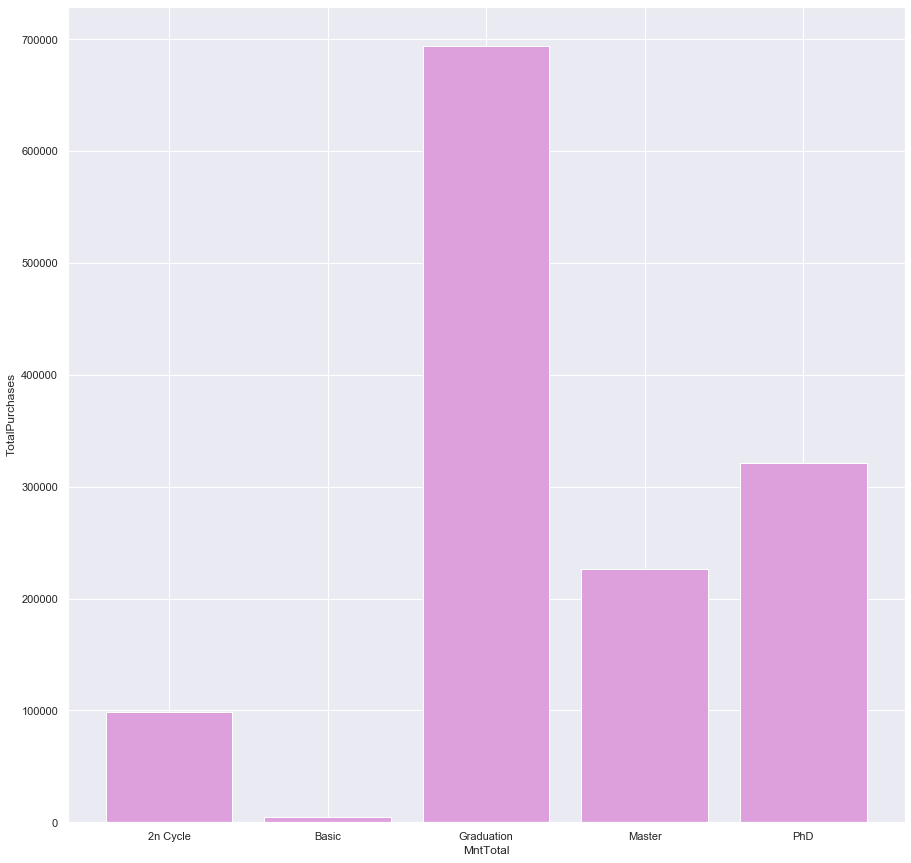

In [64]:
x = pivots['Education']
y = pivots['MntTotal']
plt.bar(x,y, color= colours)
plt.xlabel('MntTotal')
plt.ylabel('TotalPurchases')
plt.show()

In [65]:
df['TotalCampaign']= df['AcceptedCmp3'] + df['AcceptedCmp4'] +df[ 'AcceptedCmp5'] + df[ 'AcceptedCmp1'] +df['AcceptedCmp2']

In [66]:
pivots = df.groupby('MntTotal')['TotalCampaign'].sum().reset_index()

In [67]:
pivots

MntTotal  TotalCampaign
0            5              0
1            6              0
2            8              0
3            9              0
4           10              0
...        ...            ...
1043      2352              1
1044      2440              0
1045      2486              3
1046      2524              3
1047      2525              2

[1048 rows x 2 columns]

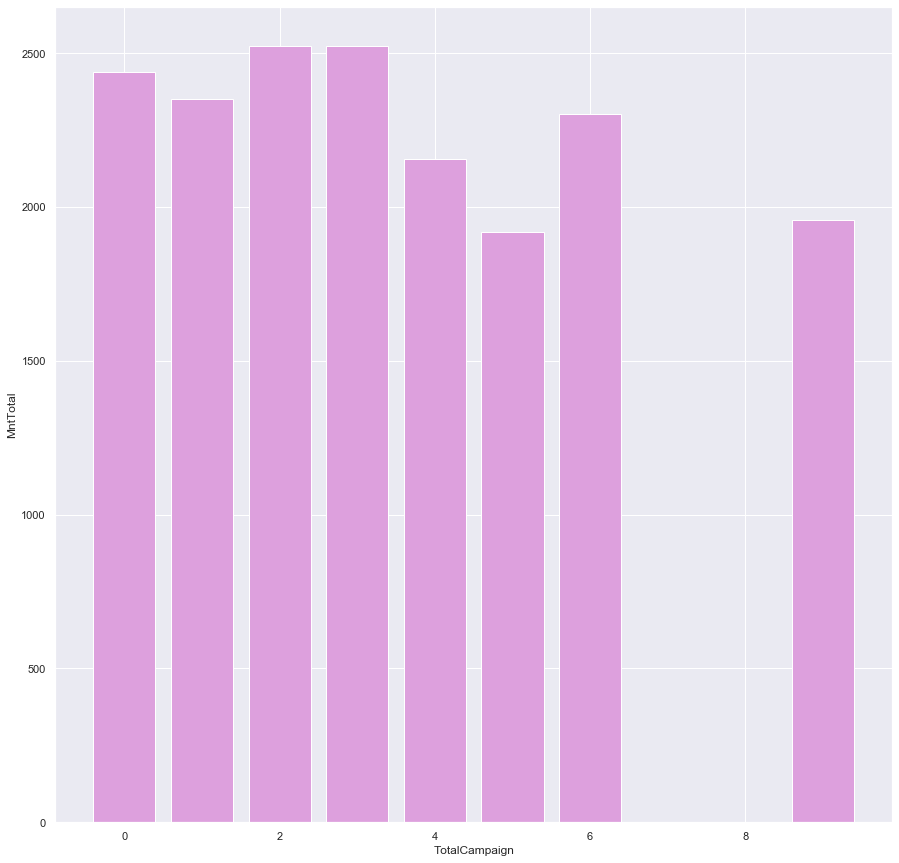

In [68]:
x = pivots['TotalCampaign']
y = pivots['MntTotal']
plt.bar(x,y, color= colours)
plt.xlabel('TotalCampaign')
plt.ylabel('MntTotal')
plt.show()

<h1> Feature Engineering

In [69]:
df.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3  10-02-2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  MntTotal  \
0             0             0             0         0         1      1617   
1             0             0             0         0         0        27   
2             0             0             0         0         0       776   
3             0             0             0         0         0        53   
4             0             0             0         0         0       422   

   TotalPurchases  TotalCampaign  
0              22              0  
1               4              0  
2              20              0  
3               6              0  
4              14              0  

[5 rows x 30 columns]

Let's start by converting the text to numerical values

In [70]:
#checking what values there are 
df['Education'].value_counts()

Graduation    1123
PhD            481
Master         369
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [71]:
#checking what values there are 
df['Marital_Status'].value_counts()

Married     860
Together    577
Single      475
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [72]:
#replacing some values in marital status to improve data quality
df['Marital_Status'] = df['Marital_Status'].replace(['Alone'],'Single')

In [73]:
#checking what values there are 
df['Marital_Status'].value_counts()

Married     860
Together    577
Single      478
Divorced    231
Widow        77
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [74]:
df.drop(df[df['Marital_Status']=='YOLO'].index , inplace = True)

In [75]:
df.drop(df[df['Marital_Status']=='Absurd'].index , inplace = True)

In [76]:

df['Marital_Status'].value_counts()

Married     860
Together    577
Single      478
Divorced    231
Widow        77
Name: Marital_Status, dtype: int64

In [77]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
MntTotal                 int64
TotalPurchases           int64
TotalCampaign            int64
dtype: object

In [78]:
# converting Dt_Customer to datetime 
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [79]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response    

In [80]:
from datetime import datetime
now = datetime.now()

In [81]:
df['Dt_Customer']= df['Dt_Customer'] - now

In [82]:
df['Dt_Customer'] = df['Dt_Customer'] * -1

In [83]:
df['Dt_Customer'] = df['Dt_Customer'].dt.days

In [84]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  \
0            0         3586       58       635  ...             0   
1            1         2740       38        11  ...             0   
2            0         3087       26       426  ...             0   
3            0         2680       26        11  ...             0   
4            0         2936       94       173  ...             0   
...        ...          ...      ...       ...  ...           ...   
2235         1         3156       46       709  ...             0   
2236         1         2676       56       406  ...             0   
2237         0         2930       91       908  ...             0   
2238         1         2931        8       428  ...             0   
2239         1         3397       40        84  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Response  MntTotal  TotalPurchases  TotalCampaign  
0            1      1617              22              0  
1            0        27               4              0  
2            0       776              20              0  
3            0        53               6              0  
4            0       422              14              0  
...        ...       ...             ...            ...  
2235         0      1341              16              0  
2236         0       444              15              1  
2237         0      1241              18              1  
2238         0       843              21              0  
2239         1       172               8              0  

[2223 rows x 30 columns]

In [85]:
df['Dt_Customer'] = df['Dt_Customer'].astype(int)

In [86]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer              int32
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
MntTotal                 int64
TotalPurchases           int64
TotalCampaign            int64
dtype: object

In [87]:
#dropping ID as it isn't needed for clustering as it doesn't give information about the customers
df = df.drop('ID', axis =1)

<h2> Encoding 

<h3> Encoding 'Education'

In [88]:
ordinal = ['Education']

In [89]:
df_ordinal=df[ordinal]

In [90]:
dicts1 = {'Responsibility': {'Basic': 0,
                             'Graduation':1,
                             'Master':2,
                             '2n Cycle':2,
                             'PhD': 3}}

In [91]:
df['Education'] = df['Education'].replace(['Basic','Graduation','Master','2n Cycle','PhD'],[0,1,2,2,3])


In [92]:
df.head(5)

Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957          1         Single  58138.0        0         0   
1        1954          1         Single  46344.0        1         1   
2        1965          1       Together  71613.0        0         0   
3        1984          1       Together  26646.0        1         0   
4        1981          3        Married  58293.0        1         0   

   Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp3  AcceptedCmp4  \
0         3586       58       635         88  ...             0             0   
1         2740       38        11          1  ...             0             0   
2         3087       26       426         49  ...             0             0   
3         2680       26        11          4  ...             0             0   
4         2936       94       173         43  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  MntTotal  \
0             0             0             0         0         1      1617   
1             0             0             0         0         0        27   
2             0             0             0         0         0       776   
3             0             0             0         0         0        53   
4             0             0             0         0         0       422   

   TotalPurchases  TotalCampaign  
0              22              0  
1               4              0  
2              20              0  
3               6              0  
4              14              0  

[5 rows x 29 columns]

<h3> Encoding Marital Status

In [93]:
from sklearn.preprocessing import OneHotEncoder

In [94]:
one_hot = OneHotEncoder()

In [95]:
marital_status = df[['Marital_Status']]

In [96]:
mar_stat_encoded = one_hot.fit_transform(marital_status)

In [97]:
df.head(5)

Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957          1         Single  58138.0        0         0   
1        1954          1         Single  46344.0        1         1   
2        1965          1       Together  71613.0        0         0   
3        1984          1       Together  26646.0        1         0   
4        1981          3        Married  58293.0        1         0   

   Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp3  AcceptedCmp4  \
0         3586       58       635         88  ...             0             0   
1         2740       38        11          1  ...             0             0   
2         3087       26       426         49  ...             0             0   
3         2680       26        11          4  ...             0             0   
4         2936       94       173         43  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  MntTotal  \
0             0             0             0         0         1      1617   
1             0             0             0         0         0        27   
2             0             0             0         0         0       776   
3             0             0             0         0         0        53   
4             0             0             0         0         0       422   

   TotalPurchases  TotalCampaign  
0              22              0  
1               4              0  
2              20              0  
3               6              0  
4              14              0  

[5 rows x 29 columns]

In [98]:
mar_stat_encoded.toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [99]:
encoded_df = pd.get_dummies(df, columns=['Marital_Status'])
encoded_df

Year_Birth  Education   Income  Kidhome  Teenhome  Dt_Customer  Recency  \
0           1957          1  58138.0        0         0         3586       58   
1           1954          1  46344.0        1         1         2740       38   
2           1965          1  71613.0        0         0         3087       26   
3           1984          1  26646.0        1         0         2680       26   
4           1981          3  58293.0        1         0         2936       94   
...          ...        ...      ...      ...       ...          ...      ...   
2235        1967          1  61223.0        0         1         3156       46   
2236        1946          3  64014.0        2         1         2676       56   
2237        1981          1  56981.0        0         0         2930       91   
2238        1956          2  69245.0        0         1         2931        8   
2239        1954          3  52869.0        1         1         3397       40   

      MntWines  MntFruits  MntMeatProducts  ...  Complain  Response  MntTotal  \
0          635         88              546  ...         0         1      1617   
1           11          1                6  ...         0         0        27   
2          426         49              127  ...         0         0       776   
3           11          4               20  ...         0         0        53   
4          173         43              118  ...         0         0       422   
...        ...        ...              ...  ...       ...       ...       ...   
2235       709         43              182  ...         0         0      1341   
2236       406          0               30  ...         0         0       444   
2237       908         48              217  ...         0         0      1241   
2238       428         30              214  ...         0         0       843   
2239        84          3               61  ...         0         1       172   

      TotalPurchases  TotalCampaign  Marital_Status_Divorced  \
0                 22              0                        0   
1                  4              0                        0   
2                 20              0                        0   
3                  6              0                        0   
4                 14              0                        0   
...              ...            ...                      ...   
2235              16              0                        0   
2236              15              1                        0   
2237              18              1                        1   
2238              21              0                        0   
2239               8              0                        0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                          0                      1                        0   
1                          0                      1                        0   
2                          0                      0                        1   
3                          0                      0                        1   
4                          1                      0                        0   
...                      ...                    ...                      ...   
2235                       1                      0                        0   
2236                       0                      0                        1   
2237                       0                      0                        0   
2238                       0                      0                        1   
2239                       1                      0                        0   

      Marital_Status_Widow  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
2235                     0  
2236                     0  
2237                     0  
2238                     0  
2239       

In [100]:
encoded_df.dtypes

Year_Birth                   int64
Education                    int64
Income                     float64
Kidhome                      int64
Teenhome                     int64
Dt_Customer                  int32
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
AcceptedCmp3                 int64
AcceptedCmp4                 int64
AcceptedCmp5                 int64
AcceptedCmp1                 int64
AcceptedCmp2                 int64
Complain                     int64
Response                     int64
MntTotal                     int64
TotalPurchases               int64
TotalCampaign                int64
Marital_Status_Divor

In [101]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\neveg\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



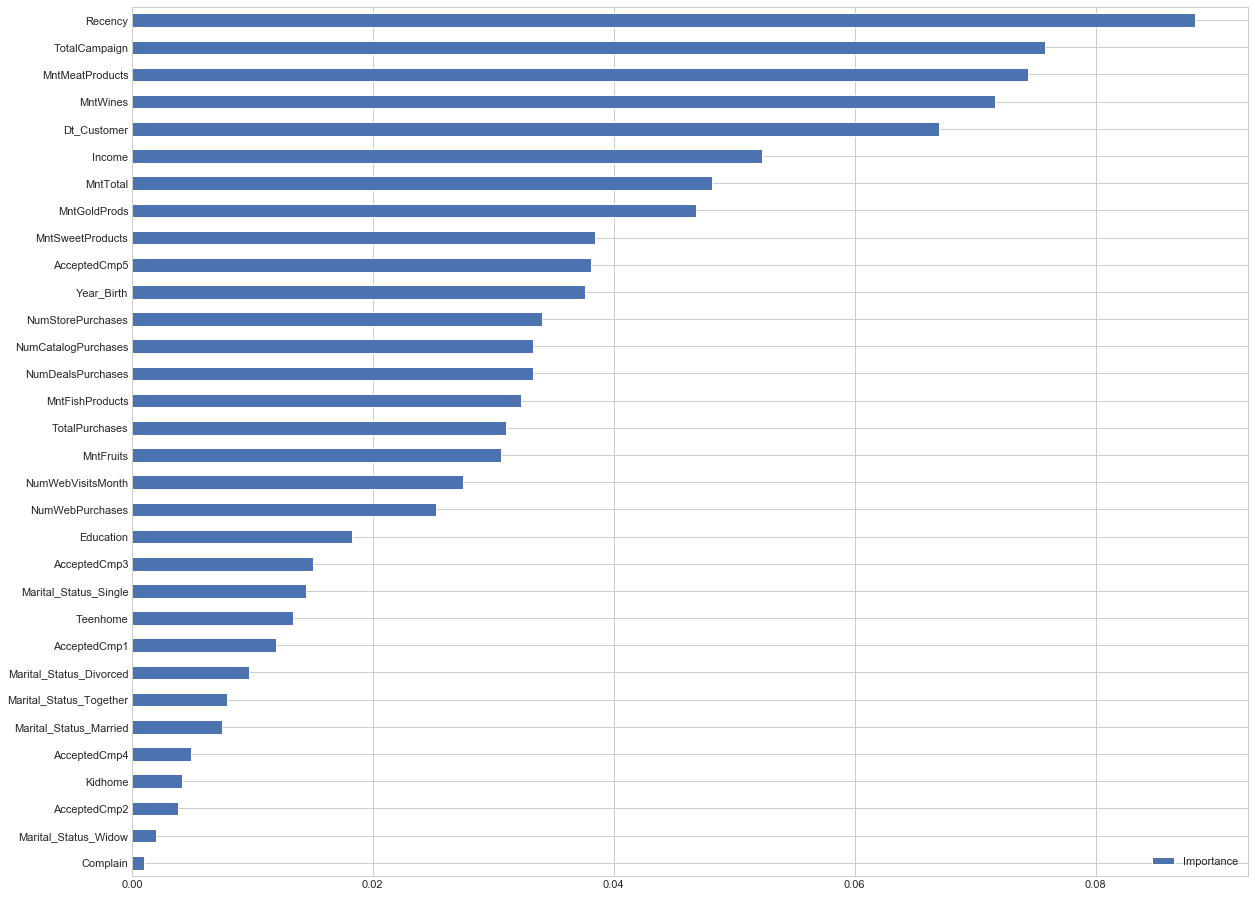

In [102]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(encoded_df.drop('Response', axis=1), encoded_df['Response'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=encoded_df.drop('Response', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

<h2>Feature Scaling 

We need to use feature scaling since we are using K Means, which computes based of distance. We saw using the histograms that most of our data is not normally distributed, and there are many outliers, therefore we will use RobustScaler

In [251]:
from sklearn.preprocessing import RobustScaler

In [252]:
scaler = RobustScaler()
scaled_df = scaler.fit_transform(encoded_df)


In [253]:
 scaled_df = pd.DataFrame(scaled_df)

In [254]:
scaled_df

0    1         2    3    4         5     6         7        8   \
0    -0.722222  0.0  0.198516  0.0  0.0  1.329463  0.16  0.954262  2.50000   
1    -0.888889  0.0 -0.162405  1.0  1.0 -1.126270 -0.24 -0.343035 -0.21875   
2    -0.277778  0.0  0.610879  0.0  0.0 -0.119013 -0.48  0.519751  1.28125   
3     0.777778  0.0 -0.765205  1.0  0.0 -1.300435 -0.48 -0.343035 -0.12500   
4     0.611111  2.0  0.203259  1.0  0.0 -0.557329  0.88 -0.006237  1.09375   
...        ...  ...       ...  ...  ...       ...   ...       ...      ...   
2218 -0.166667  0.0  0.292923  0.0  1.0  0.081277 -0.08  1.108108  1.09375   
2219 -1.333333  2.0  0.378334  2.0  1.0 -1.312046  0.12  0.478170 -0.25000   
2220  0.611111  0.0  0.163109  0.0  0.0 -0.574746  0.82  1.521830  1.25000   
2221 -0.777778  1.0  0.538413  0.0  1.0 -0.571843 -0.84  0.523909  0.68750   
2222 -0.888889  2.0  0.037273  1.0  1.0  0.780842 -0.20 -0.191268 -0.15625   

            9   ...   23   24        25        26   27   28   29   30   31  \
0     2.238318  ...  0.0  1.0  1.255910  0.833333  0.0  0.0  0.0  1.0  0.0   
1    -0.285047  ...  0.0  0.0 -0.378212 -0.666667  0.0  0.0  0.0  1.0  0.0   
2     0.280374  ...  0.0  0.0  0.391572  0.666667  0.0  0.0  0.0  0.0  1.0   
3    -0.219626  ...  0.0  0.0 -0.351490 -0.500000  0.0  0.0  0.0  0.0  1.0   
4     0.238318  ...  0.0  0.0  0.027749  0.166667  0.0  0.0  1.0  0.0  0.0   
...        ...  ...  ...  ...       ...       ...  ...  ...  ...  ...  ...   
2218  0.537383  ...  0.0  0.0  0.972251  0.333333  0.0  0.0  1.0  0.0  0.0   
2219 -0.172897  ...  0.0  0.0  0.050360  0.250000  1.0  0.0  0.0  0.0  1.0   
2220  0.700935  ...  0.0  0.0  0.869476  0.500000  1.0  1.0  0.0  0.0  0.0   
2221  0.686916  ...  0.0  0.0  0.460432  0.750000  0.0  0.0  0.0  0.0  1.0   
2222 -0.028037  ...  0.0  1.0 -0.229188 -0.333333  0.0  0.0  1.0  0.0  0.0   

       32  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
...   ...  
2218  0.0  
2219  0.0  
2220  0.0  
2221  0.0  
2222  0.0  

[2223 rows x 33 columns]

In [255]:
# renaming the columns so we can correctly identify them later
scaled_df.columns = encoded_df.columns

In [256]:
scaled_df

Year_Birth  Education    Income  Kidhome  Teenhome  Dt_Customer  \
0      -0.722222        0.0  0.198516      0.0       0.0     1.329463   
1      -0.888889        0.0 -0.162405      1.0       1.0    -1.126270   
2      -0.277778        0.0  0.610879      0.0       0.0    -0.119013   
3       0.777778        0.0 -0.765205      1.0       0.0    -1.300435   
4       0.611111        2.0  0.203259      1.0       0.0    -0.557329   
...          ...        ...       ...      ...       ...          ...   
2218   -0.166667        0.0  0.292923      0.0       1.0     0.081277   
2219   -1.333333        2.0  0.378334      2.0       1.0    -1.312046   
2220    0.611111        0.0  0.163109      0.0       0.0    -0.574746   
2221   -0.777778        1.0  0.538413      0.0       1.0    -0.571843   
2222   -0.888889        2.0  0.037273      1.0       1.0     0.780842   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  Complain  Response  \
0        0.16  0.954262    2.50000         2.238318  ...       0.0       1.0   
1       -0.24 -0.343035   -0.21875        -0.285047  ...       0.0       0.0   
2       -0.48  0.519751    1.28125         0.280374  ...       0.0       0.0   
3       -0.48 -0.343035   -0.12500        -0.219626  ...       0.0       0.0   
4        0.88 -0.006237    1.09375         0.238318  ...       0.0       0.0   
...       ...       ...        ...              ...  ...       ...       ...   
2218    -0.08  1.108108    1.09375         0.537383  ...       0.0       0.0   
2219     0.12  0.478170   -0.25000        -0.172897  ...       0.0       0.0   
2220     0.82  1.521830    1.25000         0.700935  ...       0.0       0.0   
2221    -0.84  0.523909    0.68750         0.686916  ...       0.0       0.0   
2222    -0.20 -0.191268   -0.15625        -0.028037  ...       0.0       1.0   

      MntTotal  TotalPurchases  TotalCampaign  Marital_Status_Divorced  \
0     1.255910        0.833333            0.0                      0.0   
1    -0.378212       -0.666667            0.0                      0.0   
2     0.391572        0.666667            0.0                      0.0   
3    -0.351490       -0.500000            0.0                      0.0   
4     0.027749        0.166667            0.0                      0.0   
...        ...             ...            ...                      ...   
2218  0.972251        0.333333            0.0                      0.0   
2219  0.050360        0.250000            1.0                      0.0   
2220  0.869476        0.500000            1.0                      1.0   
2221  0.460432        0.750000            0.0                      0.0   
2222 -0.229188       -0.333333            0.0                      0.0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                        0.0                    1.0                      0.0   
1                        0.0                    1.0                      0.0   
2                        0.0                    0.0                      1.0   
3                        0.0                    0.0                      1.0   
4                        1.0                    0.0                      0.0   
...                      ...                    ...                      ...   
2218                     1.0                    0.0                      0.0   
2219                     0.0                    0.0                      1.0   
2220                     0.0                    0.0                      0.0   
2221                     0.0                    0.0                      1.0   
2222                     1.0                    0.0                      0.0   

      Marital_Status_Widow  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  
...                    ...  
2218                   0.0  
2219                   0.0  
2220                   0.0  
2221                   0.0  

<H2> Model 1:
    
    Scaler = RobustScaler
    PCA = 3
    Algorithm = Kmeans

<h2> Dimensionality Reduction

In [257]:
 from sklearn.decomposition import PCA

In [258]:
import numpy as np

In [259]:
# transforming with PCA
pca = PCA(n_components=3, random_state=42)
reduced = pca.fit_transform(scaled_df)

# convert into df for the algoritm
reduced_df = pd.DataFrame(reduced, columns=['Column1', 'Column2', 'Column3'])

In [260]:
#understanding the variance that the principal components hold
pca.explained_variance_ratio_

array([0.39409461, 0.09010259, 0.07072796])

In [261]:
reduced_df

Column1   Column2   Column3
0     4.613435  0.020969  1.412240
1    -2.297269 -0.713571 -0.076179
2     1.457210 -0.364246  0.116823
3    -2.237146 -1.126718  0.281477
4    -0.133694  0.400939  0.112140
...        ...       ...       ...
2218  3.229239  1.152993  2.039017
2219 -1.515245  2.483892 -0.783114
2220  0.885020 -0.305581 -0.969410
2221  1.412657  0.519689 -0.584900
2222 -1.814099  0.815098 -0.517644

[2223 rows x 3 columns]

In [221]:
#understanding the variance that the principal components hold
pca.explained_variance_ratio_

array([0.39409461, 0.09010259, 0.07072796])

In [222]:
from sklearn.cluster import KMeans

Text(0.4, 0.6, 'Elbow')

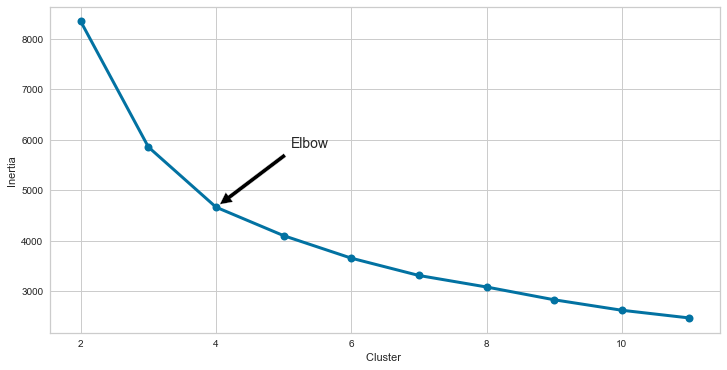

In [223]:
kmeans_per_cluster = []
for i in range(2, 12):
    fit_alg =KMeans(n_clusters = i, random_state = 0).fit(reduced_df)
    kmeans_per_cluster.append(fit_alg)
    
inertia = [model.inertia_ for model in kmeans_per_cluster]

plt.figure(figsize = (12, 6))
plt.plot(range(2, 12), inertia, 'o-', ms = 8, linewidth=3) 
plt.xlabel('Cluster ')
plt.ylabel('Inertia')
plt.annotate('Elbow', xy = (4, inertia[2]) ,xytext = (0.4, 0.6), 
             textcoords='figure fraction',fontsize = 14,
             arrowprops={'facecolor':'black', 'shrink':0.05})

We can see there is a drop in Inertia here so assume 4 is the best number of clusters

In [224]:
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'Silhouette Score')

<Figure size 864x432 with 0 Axes>

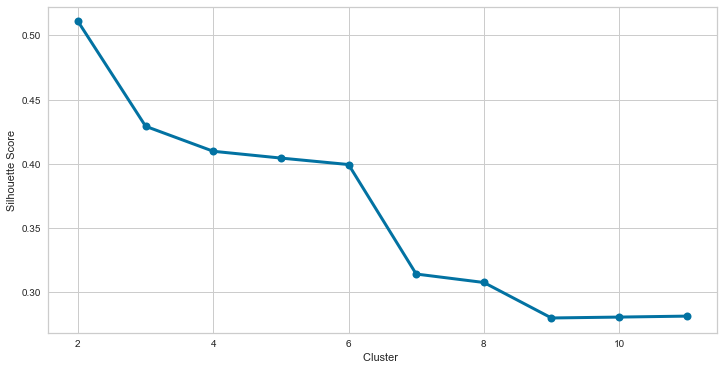

In [225]:
plt.figure(figsize = (12, 6))   
slh_score = [silhouette_score(reduced_df, model.labels_) for model in kmeans_per_cluster]
plt.figure(figsize = (12, 6))
plt.plot(range(2, 12), slh_score, 'o-', ms = 8, linewidth=3) 
plt.xlabel('Cluster ')
plt.ylabel('Silhouette Score')

In [226]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

In [265]:
#fitting KMeans to four clusters
kmeans = KMeans(n_clusters = 4)

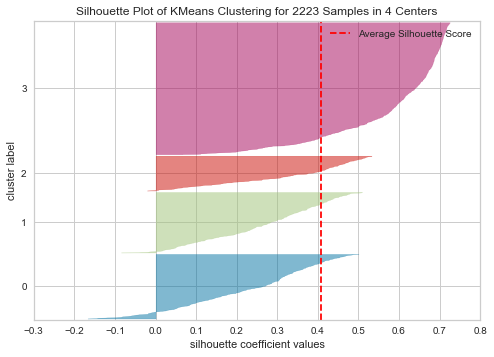

In [266]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(reduced_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [267]:
y_pred = kmeans.fit_predict(reduced_df)

In [268]:
import sklearn
sil_score_4 = sklearn.metrics.silhouette_score(reduced_df, y_pred)

In [269]:
sil_score_4

0.4090165744606002

In [276]:
#fitting KMeans to seven clusters to test since there seems to be a small peak at 7 clusters
kmeans = KMeans(n_clusters = 7)

In [277]:
y_pred = kmeans.fit_predict(reduced_df)

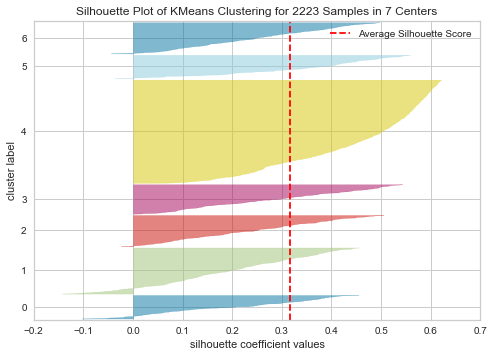

In [278]:
# adjusting k 
k = 7
#plotting visual
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(reduced_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [279]:
sil_score_7 = sklearn.metrics.silhouette_score(reduced_df, y_pred)
sil_score_7

0.3167215067362635

In [280]:
reduced_df["Clusters"] = y_pred
x= reduced_df['Column1']
y= reduced_df['Column2']
z= reduced_df['Column3']

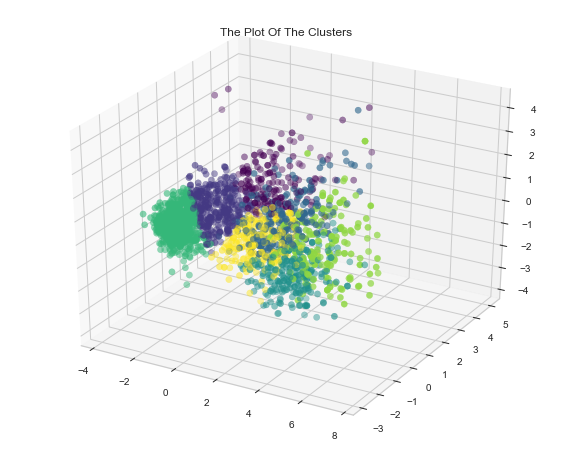

In [281]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=reduced_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

<h2>Model 2:
    
    Scaler = Robust
    PCA = 3
    Algorithm = Mean-Shift

In [128]:
#initilisng mean-shift
from sklearn.cluster import MeanShift
MSP = MeanShift()
y_pred = MSP.fit_predict(reduced_df)
#predict cluster
reduced_df["Clusters"] = y_pred

In [129]:
reduced_df["Clusters"].value_counts()


0    2189
1      34
Name: Clusters, dtype: int64

In [130]:

#finding what the silhouette score is for new model
sil_score_MSP = sklearn.metrics.silhouette_score(reduced_df, y_pred)
sil_score_MSP

0.3025361067868067

<h2> Model 3:
    
    Scaler = RobustScaler
    PCA = >95%
    ALgorithm = KMeans

I am testing different values of components for PCA in order to find the right number and select this for another model 

In [131]:
#initisialiting the PCA so that the number of components are enough that it holds >=95% of the variance
pca = PCA()
pca.fit(scaled_df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95)

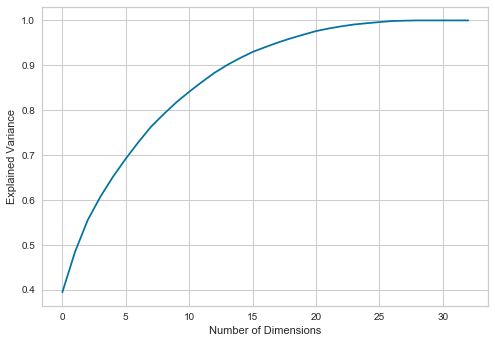

In [132]:
#a plot to see the variance against number of dimensions 
plt.plot(cumsum)
plt.xlabel('Number of Dimensions')
plt.ylabel('Explained Variance')
plt.show()

In [133]:
# transforming with PCA
pca = PCA(n_components=d, random_state=42)
reduced = pca.fit_transform(scaled_df)

# convert into df for the algoritm
reduced_df = pd.DataFrame(reduced)

In [134]:
#understanding the variance that the principal components hold
pca.explained_variance_ratio_

array([0.39409461, 0.09010259, 0.07072796, 0.05210668, 0.04478732,
       0.03990771, 0.03704711, 0.03446268, 0.0281645 , 0.02631405,
       0.02325751, 0.02171071, 0.02061501, 0.01742104, 0.01518981,
       0.01379977, 0.01080267])

In [135]:
#fitting KMeans to four clusters
kmeans = KMeans(n_clusters = 4)

In [136]:
y_pred = kmeans.fit_predict(reduced_df)

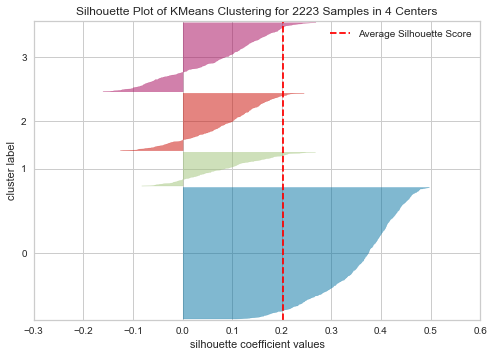

In [137]:

#plotting visual
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(reduced_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [138]:
#finding what the silhouette score is for new model
sil_score_cumsum = sklearn.metrics.silhouette_score(reduced_df, y_pred)
sil_score_cumsum

0.2018538328382895

<h2> Model 4:
    
    
    Scaler = Robust
    PCA = >95%
    Algorithm = Mean-SHift

In [139]:
#initisialiting the PCA so that the number of components are enough that it holds >=95% of the variance
pca = PCA()
pca.fit(scaled_df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95)

In [140]:
#initilisng mean-shift
from sklearn.cluster import MeanShift
MSP = MeanShift()
y_pred = MSP.fit_predict(reduced_df)
#predict cluster
reduced_df["Clusters"] = y_pred


In [141]:
reduced_df["Clusters"].value_counts()

0    1985
4     130
3      78
1      20
2       9
5       1
Name: Clusters, dtype: int64

In [142]:
#finding what the silhouette score is for new model
sil_score_MSP = sklearn.metrics.silhouette_score(reduced_df, y_pred)
sil_score_MSP

0.30183811915948294

<h2> Model 5:
    
    
    Scaler = Quantile
    PCA = 3
    Algorithm = KMeans

Testing to see if the data set is linear to be able to see if we can apply QuantileTransformer, since you can only apply this to non linear data

In [467]:
encoded_df.columns

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'MntTotal', 'TotalPurchases', 'TotalCampaign',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')

In [468]:
#fitting lin reg to see if dataset is lineat
xcolumns = ['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow']

In [469]:
X = encoded_df[xcolumns]

In [470]:
Y = encoded_df['NumWebPurchases']

In [471]:
# Applying linear reg
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X, Y)

In [472]:
# Checking the accuracy
from sklearn.metrics import r2_score
print(r2_score(regressor.predict(X), Y))

0.23690616121245467


There is a low accuracy score therefore the dataset is non linear and we can use QuantileTransformer

In [473]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

scaled_df = scaler.fit_transform(encoded_df)

In [474]:
scaled_df = pd.DataFrame(scaled_df)

In [475]:
scaled_df

0         1         2         3         4         5         6   \
0     0.197698  0.276777  0.599963  0.000000  0.000000  0.976977  0.594094   
1     0.130631  0.276777  0.423423  0.777277  0.746747  0.041542  0.388889   
2     0.367868  0.276777  0.800753  0.000000  0.000000  0.441441  0.267267   
3     0.892893  0.276777  0.124263  0.777277  0.000000  0.027528  0.267267   
4     0.837838  1.000000  0.601708  0.777277  0.000000  0.234234  0.948949   
...        ...       ...       ...       ...       ...       ...       ...   
2218  0.416416  0.276777  0.640360  0.000000  0.746747  0.537037  0.457958   
2219  0.014014  1.000000  0.685686  1.000000  0.746747  0.022022  0.572072   
2220  0.837838  0.276777  0.581991  0.000000  0.000000  0.223724  0.916416   
2221  0.175676  0.656657  0.763749  0.000000  0.746747  0.226226  0.086086   
2222  0.130631  1.000000  0.522713  0.777277  0.746747  0.862362  0.408408   

            7         8         9   ...   23   24        25        26  \
0     0.828328  0.908909  0.918919  ...  0.0  1.0  0.921180  0.885385   
1     0.153654  0.214715  0.082082  ...  0.0  0.0  0.070571  0.107608   
2     0.703146  0.818819  0.632132  ...  0.0  0.0  0.647240  0.811311   
3     0.153654  0.377878  0.300300  ...  0.0  0.0  0.188188  0.276777   
4     0.496997  0.795295  0.616116  ...  0.0  0.0  0.518818  0.563564   
...        ...       ...       ...  ...  ...  ...       ...       ...   
2218  0.853854  0.795295  0.708029  ...  0.0  0.0  0.852803  0.645145   
2219  0.687688  0.000000  0.378378  ...  0.0  0.0  0.530531  0.604104   
2220  0.921922  0.815315  0.739239  ...  0.0  0.0  0.825836  0.730731   
2221  0.703910  0.735235  0.731732  ...  0.0  0.0  0.672066  0.849349   
2222  0.399900  0.329329  0.483483  ...  0.0  1.0  0.385119  0.388889   

            27   28   29   30   31   32  
0     0.000000  0.0  0.0  1.0  0.0  0.0  
1     0.000000  0.0  0.0  1.0  0.0  0.0  
2     0.000000  0.0  0.0  0.0  1.0  0.0  
3     0.000000  0.0  0.0  0.0  1.0  0.0  
4     0.000000  0.0  1.0  0.0  0.0  0.0  
...        ...  ...  ...  ...  ...  ...  
2218  0.000000  0.0  1.0  0.0  0.0  0.0  
2219  0.865866  0.0  0.0  0.0  1.0  0.0  
2220  0.865866  1.0  0.0  0.0  0.0  0.0  
2221  0.000000  0.0  0.0  0.0  1.0  0.0  
2222  0.000000  0.0  1.0  0.0  0.0  0.0  

[2223 rows x 33 columns]

In [476]:
# renaming the columns so we can correctly identify them later
scaled_df.columns = encoded_df.columns

In [477]:
# transforming with PCA
pca = PCA(n_components=3, random_state=42)
reduced = pca.fit_transform(scaled_df)

# convert into df for the algoritm
reduced_df = pd.DataFrame(reduced, columns=['Column1', 'Column2', 'Column3'])

In [478]:
#fitting KMeans to four clusters
kmeans = KMeans(n_clusters = 7)
y_pred = kmeans.fit_predict(reduced_df)

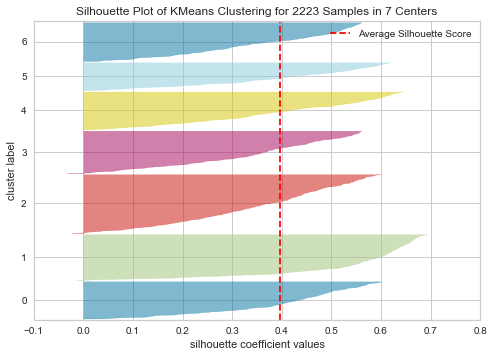

In [479]:

#plotting visual
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(reduced_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [480]:
#finding what the silhouette score is for new model
sil_score_quantscale = sklearn.metrics.silhouette_score(reduced_df, y_pred)
sil_score_quantscale

0.3953694633319499

In [464]:
reduced_df["Clusters"] = y_pred

In [465]:
reduced_df["Clusters"] = y_pred
x= reduced_df['Column1']
y= reduced_df['Column2']
z= reduced_df['Column3']

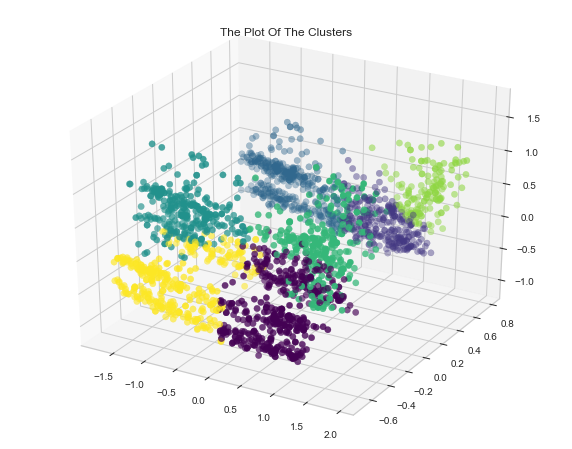

In [466]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=reduced_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

There is a slightly smaller overall silhouette score, but the clusters seem to be further over the avergage line, and there is a higher maximum silhouette score. 

<h2>Model 6:
    
    Scaler= Quantile
    PCA = 3
    Algorithm = Mean-Shift

In [157]:
#initilisng mean-shift
from sklearn.cluster import MeanShift
MSP = MeanShift()
y_pred = MSP.fit_predict(reduced_df)
#predict cluster
reduced_df["Clusters"] = y_pred


In [158]:

reduced_df["Clusters"].value_counts()


0    1190
1    1033
Name: Clusters, dtype: int64

In [159]:

#finding what the silhouette score is for new model
sil_score_MSP = sklearn.metrics.silhouette_score(reduced_df, y_pred)
sil_score_MSP

0.48401456797857834

In [187]:
from mpl_toolkits.mplot3d import Axes3D 

In [189]:
x= reduced_df['Column1']
y= reduced_df['Column2']
z= reduced_df['Column3']

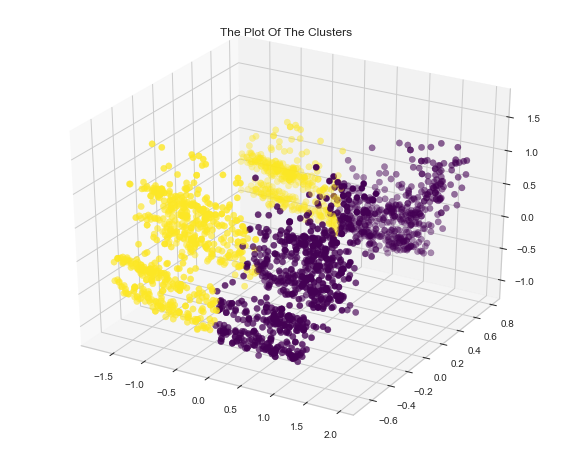

In [193]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=reduced_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

<h2>Model 7:
    
    Scaler= Quantile
    PCA = >95%
    Algorithm = KMean

In [160]:
#initisialiting the PCA so that the number of components are enough that it holds >=95% of the variance
pca = PCA()
pca.fit(scaled_df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95)

In [161]:
#fitting KMeans to four clusters
kmeans = KMeans(n_clusters = 4)
y_pred = kmeans.fit_predict(reduced_df)

In [162]:
#finding what the silhouette score is for new model
sil_score_quantscale = sklearn.metrics.silhouette_score(reduced_df, y_pred)
sil_score_quantscale

0.4088688069100103

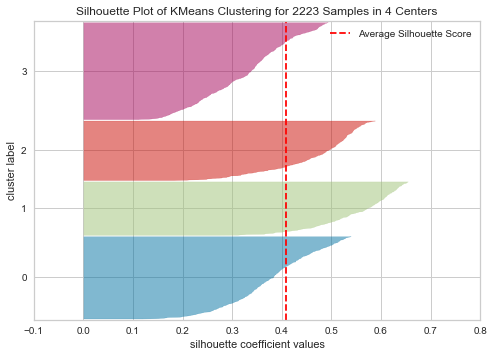

In [163]:

#plotting visual
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(reduced_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

<h2>Model 8:
    
    Scaler= Quantile
    PCA = >95%
    Algorithm = Mean-Shift

In [194]:
#initilisng mean-shift
from sklearn.cluster import MeanShift
MSP = MeanShift()
y_pred = MSP.fit_predict(reduced_df)
#predict cluster
reduced_df["Clusters"] = y_pred


In [195]:


reduced_df["Clusters"].value_counts()


0    1190
1    1033
Name: Clusters, dtype: int64

In [196]:

#finding what the silhouette score is for new model
sil_score_MSP = sklearn.metrics.silhouette_score(reduced_df, y_pred)
sil_score_MSP

0.48401456797857834

In [198]:
reduced_df

Column1   Column2   Column3  Clusters
0     1.211375 -0.443343  0.600155         0
1    -1.149167 -0.402122  0.298444         1
2     0.849522 -0.619334 -0.422648         0
3    -1.005214 -0.629075 -0.081313         1
4     0.158863  0.702552 -0.032173         0
...        ...       ...       ...       ...
2218  0.847253  0.711516 -0.449952         0
2219 -0.246450 -0.538694 -0.594472         1
2220  0.860961 -0.180800  0.395182         0
2221  0.934056 -0.587474 -0.880935         0
2222 -0.447774  0.672555 -0.138637         1

[2223 rows x 4 columns]

In [197]:
x= reduced_df['Column1']
y= reduced_df['Column2']
z= reduced_df['Column3']

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=reduced_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

<h2> Final Model

In [360]:
scaler = QuantileTransformer()
scaled_df = scaler.fit_transform(encoded_df)
scaled_df = pd.DataFrame(scaled_df)

In [361]:
scaled_df

0         1         2         3         4         5         6   \
0     0.197698  0.276777  0.599963  0.000000  0.000000  0.976977  0.594094   
1     0.130631  0.276777  0.423423  0.777277  0.746747  0.041542  0.388889   
2     0.367868  0.276777  0.800753  0.000000  0.000000  0.441441  0.267267   
3     0.892893  0.276777  0.124263  0.777277  0.000000  0.027528  0.267267   
4     0.837838  1.000000  0.601708  0.777277  0.000000  0.234234  0.948949   
...        ...       ...       ...       ...       ...       ...       ...   
2218  0.416416  0.276777  0.640360  0.000000  0.746747  0.537037  0.457958   
2219  0.014014  1.000000  0.685686  1.000000  0.746747  0.022022  0.572072   
2220  0.837838  0.276777  0.581991  0.000000  0.000000  0.223724  0.916416   
2221  0.175676  0.656657  0.763749  0.000000  0.746747  0.226226  0.086086   
2222  0.130631  1.000000  0.522713  0.777277  0.746747  0.862362  0.408408   

            7         8         9   ...   23   24        25        26  \
0     0.828328  0.908909  0.918919  ...  0.0  1.0  0.921180  0.885385   
1     0.153654  0.214715  0.082082  ...  0.0  0.0  0.070571  0.107608   
2     0.703146  0.818819  0.632132  ...  0.0  0.0  0.647240  0.811311   
3     0.153654  0.377878  0.300300  ...  0.0  0.0  0.188188  0.276777   
4     0.496997  0.795295  0.616116  ...  0.0  0.0  0.518818  0.563564   
...        ...       ...       ...  ...  ...  ...       ...       ...   
2218  0.853854  0.795295  0.708029  ...  0.0  0.0  0.852803  0.645145   
2219  0.687688  0.000000  0.378378  ...  0.0  0.0  0.530531  0.604104   
2220  0.921922  0.815315  0.739239  ...  0.0  0.0  0.825836  0.730731   
2221  0.703910  0.735235  0.731732  ...  0.0  0.0  0.672066  0.849349   
2222  0.399900  0.329329  0.483483  ...  0.0  1.0  0.385119  0.388889   

            27   28   29   30   31   32  
0     0.000000  0.0  0.0  1.0  0.0  0.0  
1     0.000000  0.0  0.0  1.0  0.0  0.0  
2     0.000000  0.0  0.0  0.0  1.0  0.0  
3     0.000000  0.0  0.0  0.0  1.0  0.0  
4     0.000000  0.0  1.0  0.0  0.0  0.0  
...        ...  ...  ...  ...  ...  ...  
2218  0.000000  0.0  1.0  0.0  0.0  0.0  
2219  0.865866  0.0  0.0  0.0  1.0  0.0  
2220  0.865866  1.0  0.0  0.0  0.0  0.0  
2221  0.000000  0.0  0.0  0.0  1.0  0.0  
2222  0.000000  0.0  1.0  0.0  0.0  0.0  

[2223 rows x 33 columns]

In [362]:

# renaming the columns so we can correctly identify them later
scaled_df.columns = encoded_df.columns

In [363]:
# transforming with PCA
pca = PCA(n_components=3, random_state=42)
reduced = pca.fit_transform(scaled_df)

In [364]:

# convert into df for the algoritm
reduced_df = pd.DataFrame(reduced, columns=['Column1', 'Column2', 'Column3'])

In [365]:
#fitting KMeans to four clusters
kmeans = KMeans(n_clusters = 4)
y_pred = kmeans.fit_predict(reduced_df)


In [366]:
reduced_df["Clusters"] = y_pred
x= reduced_df['Column1']
y= reduced_df['Column2']
z= reduced_df['Column3']

<h2> Customer Analysis for cluster for final model

In [380]:
labeled_data = df.copy()
labeled_data['Cluster Label'] = kmeans.labels_

In [368]:
labeled_data

Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957          1         Single  58138.0        0         0   
1           1954          1         Single  46344.0        1         1   
2           1965          1       Together  71613.0        0         0   
3           1984          1       Together  26646.0        1         0   
4           1981          3        Married  58293.0        1         0   
...          ...        ...            ...      ...      ...       ...   
2235        1967          1        Married  61223.0        0         1   
2236        1946          3       Together  64014.0        2         1   
2237        1981          1       Divorced  56981.0        0         0   
2238        1956          2       Together  69245.0        0         1   
2239        1954          3        Married  52869.0        1         1   

      Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp4  \
0            3586       58       635         88  ...             0   
1            2740       38        11          1  ...             0   
2            3087       26       426         49  ...             0   
3            2680       26        11          4  ...             0   
4            2936       94       173         43  ...             0   
...           ...      ...       ...        ...  ...           ...   
2235         3156       46       709         43  ...             0   
2236         2676       56       406          0  ...             0   
2237         2930       91       908         48  ...             1   
2238         2931        8       428         30  ...             0   
2239         3397       40        84          3  ...             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  MntTotal  \
0                0             0             0         0         1      1617   
1                0             0             0         0         0        27   
2                0             0             0         0         0       776   
3                0             0             0         0         0        53   
4                0             0             0         0         0       422   
...            ...           ...           ...       ...       ...       ...   
2235             0             0             0         0         0      1341   
2236             0             1             0         0         0       444   
2237             0             0             0         0         0      1241   
2238             0             0             0         0         0       843   
2239             0             0             0         0         1       172   

      TotalPurchases  TotalCampaign  Cluster Label  
0                 22              0              1  
1                  4              0              0  
2                 20              0              1  
3                  6              0              0  
4                 14              0              3  
...              ...            ...            ...  
2235              16              0              3  
2236              15              1              0  
2237              18              1              1  
2238              21              0              1  
2239               8              0              2  

[2223 rows x 30 columns]

In [369]:
colours = np.array(["plum","lightcoral", "mediumaquamarine","mediumvioletred"])

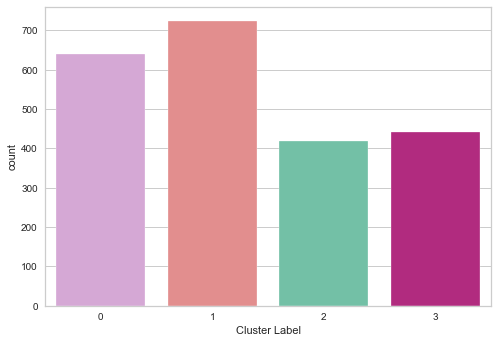

In [401]:
import seaborn as sns
ax = sns.countplot(x="Cluster Label", data=labeled_data, palette =colours)

In [371]:
labeled_data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'MntTotal', 'TotalPurchases',
       'TotalCampaign', 'Cluster Label'],
      dtype='object')

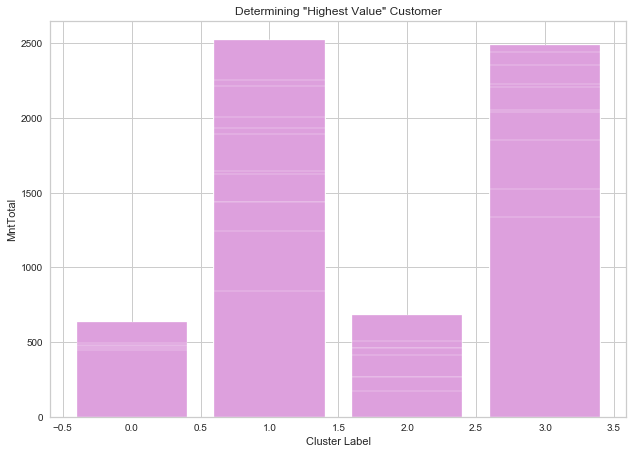

In [372]:
#plotting total amount spent against customer 
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = labeled_data['Cluster Label']
y = labeled_data['MntTotal']
ax.bar(x,y, color = "plum")
ax.set_ylabel('MntTotal')
ax.set_xlabel('Cluster Label')
ax.set_title('Determining "Highest Value" Customer')
plt.show()

In [373]:
colours = np.array(["plum","lightcoral", "mediumaquamarine","mediumvioletred"])

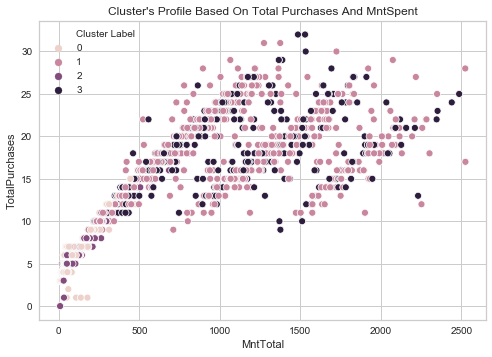

In [395]:
pl = sns.scatterplot(data = labeled_data,x=labeled_data["MntTotal"], y=labeled_data["TotalPurchases"],hue=labeled_data["Cluster Label"])
pl.set_title("Cluster's Profile Based On Total Purchases And MntSpent")
plt.legend()
plt.show()

In [389]:
highestvalue = labeled_data.groupby('Cluster Label')['MntTotal'].mean().reset_index()

In [391]:
highestvalue

Cluster Label     MntTotal
0              0   102.070423
1              1  1064.954420
2              2   107.220096
3              3  1041.223982

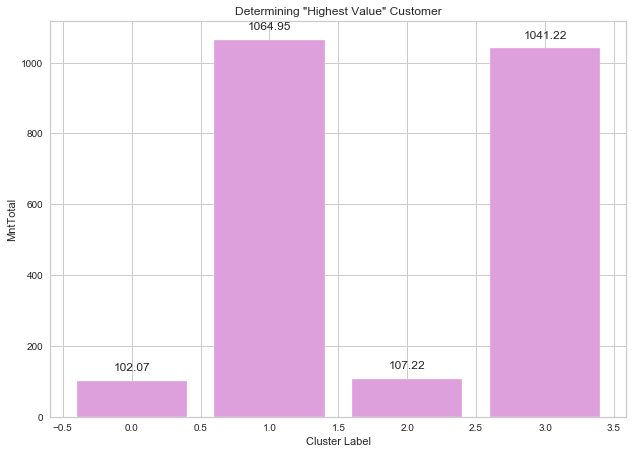

In [399]:
#plotting total amount spent against customer 
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = highestvalue['Cluster Label']
y = highestvalue['MntTotal']
ax.bar(x,y, color = "plum", data = labeled_data['Education'])
ax.set_ylabel('MntTotal')
ax.set_xlabel('Cluster Label')
ax.set_title('Determining "Highest Value" Customer')
for x,y in zip(x,y):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [402]:
labeled_data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'MntTotal', 'TotalPurchases',
       'TotalCampaign', 'Cluster Label'],
      dtype='object')

In [417]:
products = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

productsdf = labeled_data[products]

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  
0               88  
1                6  
2               42  
3                5  
4               15  
...            ...  
2235           247  
2236             8  
2237            24  
2238            61  
2239            21  

[2223 rows x 6 columns]

In [420]:
products = labeled_data.groupby('Cluster Label')[products].sum().reset_index()

In [421]:
products

Cluster Label  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0              0     31175       2847            14955             3854   
1              1    388565      33490           215487            49070   
2              2     22161       1912             9835             2670   
3              3    236498      20300           124053            27878   

   MntSweetProducts  MntGoldProds  
0              2861          9531  
1             34020         50395  
2              1926          6314  
3             21134         30358

In [429]:
products = products.drop('Cluster Label', axis =1)

In [430]:
products

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0     31175       2847            14955             3854              2861   
1    388565      33490           215487            49070             34020   
2     22161       1912             9835             2670              1926   
3    236498      20300           124053            27878             21134   

   MntGoldProds  
0          9531  
1         50395  
2          6314  
3         30358

In [443]:
one = products[1:2]

In [444]:
one

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1    388565      33490           215487            49070             34020   

   MntGoldProds  
1         50395

In [453]:
colours = np.array(["plum","lightcoral", "mediumaquamarine","mediumvioletred","powderblue", "mediumslateblue"])

C:\Users\neveg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



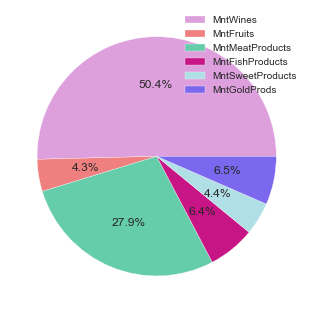

In [455]:
plt.pie(one, colors= colours, autopct='%.1f%%')
plt.legend(one)
plt.show()

In [458]:
three = products[3:4]

In [459]:
three

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
3    236498      20300           124053            27878             21134   

   MntGoldProds  
3         30358

C:\Users\neveg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



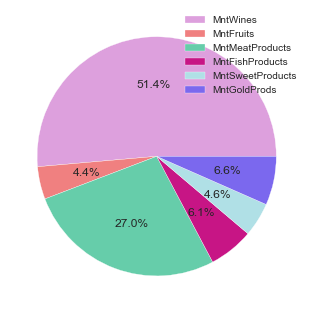

In [460]:
plt.pie(three, colors= colours, autopct='%.1f%%')
plt.legend(one)
plt.show()